# Credit Risk Modeling Of Peer-to-peer Lending Bondora Systems.

## Project Summary

### Abstract

In this project we will be doing credit risk modelling of peer to peer lending Bondora systems.Data for the study has been taken from a leading European P2P lending platform [Bondora](https://www.bondora.com/en/public-reports#dataset-file-format). The retrieved data is a pool of both defaulted and non-defaulted loans from the time period between 1st March 2009 and 27th January 2020. The data comprises of demographic and financial information of borrowers, and loan transactions.In P2P lending, loans are typically uncollateralized and lenders seek higher returns as a compensation for the financial risk they take. In addition, they need to make decisions under information asymmetry that works in favor of the borrowers. In order to make rational decisions, lenders want to minimize the risk of default of each lending decision, and realize the return that compensates for the risk.

### Background of Understanding the Problem

Peer-to-peer lending has attracted considerable attention in recent years, largely because it offers a novel way of connecting borrowers and lenders. But as with other innovative approaches to doing business, there is more to it than that. Some might wonder, for example, what makes peer-to-peer lending so different–or, perhaps, so much better–than working with a bank, or why has it become popular in many parts of the world.

Certainly, the industry has witnessed strong growth in recent years. According to Business Insider, transaction volumes in the U.S. and Europe, the world’s leading P2P markets, have expanded at double and, in some cases, triple-digit percentage rates, bolstered by widespread acceptance of doing business online and a supportive regulatory environment.

For investors, "peer-2-peer lending," or "P2P," offers an attractive way to diversify portfolios and enhance long-term performance. When they invest through a peer-to-peer platform, they can profit from an asset class that has proven itself in both good times and bad. Equally important, they can avoid the risks associated with putting all their eggs in one basket, especially at a time when many experts believe that traditional favorites such as stocks and bonds are riskier than ever.

Default risk has long been a significant risk factor to test borrowers’ behaviour in Peer-to-Peer (P2P) lending. In P2P lending, loans are typically uncollateralized and lenders seek higher returns as compensation for the financial risk they take. In addition, they need to make decisions under information asymmetry that works in favor of the borrowers. In order to make rational decisions, lenders want to minimize the risk of default of each lending decision and realize the return that compensates for the risk.

As in the financial research domain, there are very few datasets available that can be utilized for building and analyzing credit risk models. This dataset will help the research community in building and performing research in the credit risk domain.

[Reference](https://technocollabs.gitbook.io/bondora-statistics/)

**Reasons why a loan could be rejected:**
* Credit score was too low
* Debt-to-income ratio was too high
* Tried to borrow too much
* Income was insufficient or unstable
* Didn’t meet the basic requirements
* Missing information on the application
* Loan purpose didn’t meet the lender’s criteria

[Reference](https://www.lendingtree.com/personal/reasons-why-your-personal-loan-was-declined/)


## Data Wrangling

### Importing the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle

%matplotlib inline

### Discover The Data

In [2]:
df = pd.read_csv('Bondora_raw.csv')

C:\Users\lenonvo\AppData\Local\Temp\ipykernel_1292\294702529.py:1: DtypeWarning: Columns (34,37,38,80,82,83,89,90) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Bondora_raw.csv')


In [3]:
df.head()

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,...,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.0410,KARU,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1,2020-01-27,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,2009-06-10 15:48:57,0,0,140.6057,koort681,False,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2,2020-01-27,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,2009-06-05 19:12:29,0,0,319.5580,0ie,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,180+
3,2020-01-27,CE67AD25-2951-4BEE-96BD-9C2700C61EF4,668,2009-06-13 12:01:20,2009-06-13 12:01:20,0,0,57.5205,Alyona,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
4,2020-01-27,9408BF8C-B159-4D6A-9D61-9C2400A986E3,652,2009-06-10 10:17:13,2009-06-10 10:17:13,0,0,319.5582,Kai,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,180+


In [4]:
df.shape

(134529, 112)

This Dataset has 134529 records and 112 columns. 

In [5]:
df.describe()

,LoanNumber,BidsPortfolioManager,BidsApi,BidsManual,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,Gender,...,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr,NrOfScheduledPayments,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost
count,1.345290e+05,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000,134484.000000,134529.000000,134529.000000,134484.000000,...,134529.000000,134529.000000,134529.000000,91368.000000,58026.000000,134529.000000,97788.000000,97788.000000,59129.000000,59129.000000
mean,9.449392e+05,966.452876,29.111664,559.332590,13.374640,3.907908,2.817257,2.827874,40.819295,0.442097,...,701.567107,1.487620,2868.652401,928.395548,320.743805,0.069903,5.178795,50.126795,5.264702,89.851455
std,4.786738e+05,1355.686016,150.159148,750.360512,4.992375,1.726192,1.407908,1.959802,12.348693,0.636083,...,2514.595572,2.396148,4507.046575,2042.348751,1561.799076,0.359461,7.674427,12.519530,57.800582,287.449052
min,3.700000e+01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,-2.660000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,6.206790e+05,155.000000,0.000000,96.000000,10.000000,2.000000,1.000000,1.000000,31.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,0.000000,0.000000
50%,9.235970e+05,465.000000,0.000000,317.000000,13.000000,4.000000,4.000000,3.000000,40.000000,0.000000,...,0.000000,1.000000,396.354100,197.980000,0.000000,0.000000,3.000000,60.000000,0.000000,0.000000
75%,1.311025e+06,1218.000000,5.000000,729.000000,17.000000,5.000000,4.000000,4.000000,50.000000,1.000000,...,202.900000,2.000000,4250.000000,780.950000,0.000000,0.000000,7.000000,60.000000,0.000000,17.330000
max,1.855339e+06,10625.000000,7570.000000,10630.000000,23.000000,7.000000,4.000000,22.000000,77.000000,2.000000,...,64494.770000,25.000000,53762.000000,34077.420000,48100.000000,11.000000,60.000000,72.000000,3325.330000,5295.290000


In [6]:
df.columns

Index(['ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC',
       'BiddingStartedOn', 'BidsPortfolioManager', 'BidsApi', 'BidsManual',
       'UserName', 'NewCreditCustomer',
       ...
       'PreviousEarlyRepaymentsCountBeforeLoan', 'GracePeriodStart',
       'GracePeriodEnd', 'NextPaymentDate', 'NextPaymentNr',
       'NrOfScheduledPayments', 'ReScheduledOn', 'PrincipalDebtServicingCost',
       'InterestAndPenaltyDebtServicingCost', 'ActiveLateLastPaymentCategory'],
      dtype='object', length=112)

In [7]:
for i in df.columns:
  print(f'{i}:', df[i].isnull().sum(), ', Type:', df[i].dtype)

ReportAsOfEOD: 0 , Type: object
LoanId: 0 , Type: object
LoanNumber: 0 , Type: int64
ListedOnUTC: 0 , Type: object
BiddingStartedOn: 0 , Type: object
BidsPortfolioManager: 0 , Type: int64
BidsApi: 0 , Type: int64
BidsManual: 0 , Type: float64
UserName: 0 , Type: object
NewCreditCustomer: 0 , Type: bool
LoanApplicationStartedDate: 0 , Type: object
LoanDate: 0 , Type: object
ContractEndDate: 75546 , Type: object
FirstPaymentDate: 0 , Type: object
MaturityDate_Original: 0 , Type: object
MaturityDate_Last: 0 , Type: object
ApplicationSignedHour: 0 , Type: int64
ApplicationSignedWeekday: 0 , Type: int64
VerificationType: 45 , Type: float64
LanguageCode: 0 , Type: int64
Age: 0 , Type: int64
DateOfBirth: 0 , Type: object
Gender: 45 , Type: float64
Country: 0 , Type: object
AppliedAmount: 0 , Type: float64
Amount: 0 , Type: float64
Interest: 0 , Type: float64
LoanDuration: 0 , Type: int64
MonthlyPayment: 6685 , Type: float64
County: 36840 , Type: object
City: 9794 , Type: object
UseOfLoan: 0 ,

In [8]:
for colu in df.columns:
    print('{} : {}'.format(colu,df[colu].unique()))

ReportAsOfEOD : ['2020-01-27']
LoanId : ['F0660C80-83F3-4A97-8DA0-9C250112D6EC'
 '978BB85B-1C69-4D51-8447-9C240104A3A2'
 'EA44027E-7FA7-4BB2-846D-9C1F013C8A22' ...
 'E2D3384D-289A-4B4D-A2DA-A40F00F7C755'
 '7CC7AB74-995B-4467-958A-A41700F78D59'
 '3A0DEBF3-292C-4EB4-B71A-A4170157749D']
LoanNumber : [   659    654    641 ... 281602 285431 285630]
ListedOnUTC : ['2009-06-11 16:40:39' '2009-06-10 15:48:57' '2009-06-05 19:12:29' ...
 '2015-01-02 14:04:27' '2015-01-05 16:56:12' '2015-01-06 11:07:06']
BiddingStartedOn : ['2009-06-11 16:40:39' '2009-06-10 15:48:57' '2009-06-05 19:12:29' ...
 '2015-01-02 14:04:27' '2015-01-05 16:56:12' '2015-01-06 11:07:06']
BidsPortfolioManager : [   0 3110 1200 ... 4274 2974 5530]
BidsApi : [   0   10    5 ...  556 1358  317]
BidsManual : [ 115.041   140.6057  319.558  ... 7845.     6535.     6295.    ]
UserName : ['KARU' 'koort681' '0ie' ... 'BO226719A' 'BO73K5A6A' 'BO41K639A']
NewCreditCustomer : [ True False]
LoanApplicationStartedDate : ['2009-06-11 16:40:

In [9]:
df.duplicated().sum()

0

We don't have any duplicates

### Cleaning The Data

In [10]:
counter = 0
diff_between_BiddingAndListed = 0
diff_between_BiddingAndLoan = 0
for i,j,k in zip(df['BiddingStartedOn'],df['ListedOnUTC'] ,df['LoanApplicationStartedDate']):
    if (df['BiddingStartedOn'].values[counter][:10] != df['ListedOnUTC'].values[counter][:10]):
      diff_between_BiddingAndListed+=1
    if (df['BiddingStartedOn'].values[counter][:10] != df['LoanApplicationStartedDate'].values[counter][:10]):
      diff_between_BiddingAndLoan+=1
    counter+=1
shapeofBidding = df['BiddingStartedOn'].shape[0]
print(f'The difference between the BiddingStartedOnList and ListedOnUTCList is {int((diff_between_BiddingAndListed / shapeofBidding)*100)}%')
print(f'The difference between the BiddingStartedOnList and LoanApplicationStartedDate is {int((diff_between_BiddingAndLoan / shapeofBidding)*100)}%')

The difference between the BiddingStartedOnList and ListedOnUTCList is 2%
The difference between the BiddingStartedOnList and LoanApplicationStartedDate is 18%


BiddingStartedOn and ListedOnUTC columns are almost identical with only 2% difference so we will drop one of them and the LoanApplicationStartedDate column is also almost identical with only 18% difference (even the differences are only from one to two days) between it and the BiddingStartedOn.

Finally, we will drop the BiddingStartedOn and ListedOnUTC columns.

These columns: **LoanId**, **LoanNumber** and **UserName** will not affect our predictions and they don't have an impact on the analysis, with that being said we will drop them.

In [11]:
df.drop(columns=['BiddingStartedOn','ListedOnUTC','LoanId','LoanNumber','UserName'], inplace=True)

We will drop the columns that has 40% or more missing values.

In [12]:
for i in df.columns:
  percentage_of_missing_data = int((df[i].isnull().sum() / df.shape[0])* 100)
  if  percentage_of_missing_data >= 40:
    print(f'{i}: {percentage_of_missing_data}% missing values.')
    df.drop(columns = [i], inplace = True)

ContractEndDate: 56% missing values.
NrOfDependants: 73% missing values.
EmploymentPosition: 73% missing values.
WorkExperience: 72% missing values.
PlannedPrincipalTillDate: 59% missing values.
CurrentDebtDaysPrimary: 63% missing values.
DebtOccuredOn: 63% missing values.
CurrentDebtDaysSecondary: 61% missing values.
DebtOccuredOnForSecondary: 61% missing values.
DefaultDate: 68% missing values.
PlannedPrincipalPostDefault: 68% missing values.
PlannedInterestPostDefault: 68% missing values.
EAD1: 68% missing values.
EAD2: 68% missing values.
PrincipalRecovery: 68% missing values.
InterestRecovery: 68% missing values.
RecoveryStage: 42% missing values.
EL_V0: 96% missing values.
Rating_V0: 96% missing values.
EL_V1: 90% missing values.
Rating_V1: 90% missing values.
Rating_V2: 81% missing values.
ActiveLateCategory: 63% missing values.
CreditScoreEsEquifaxRisk: 90% missing values.
CreditScoreFiAsiakasTietoRiskGrade: 75% missing values.
CreditScoreEeMini: 46% missing values.
PrincipalWr

### Handling Missing Values

In [13]:
numerical_columns = df.select_dtypes(include=['float64','int64']).columns.to_list()

In [14]:
numerical_columns

['BidsPortfolioManager',
 'BidsApi',
 'BidsManual',
 'ApplicationSignedHour',
 'ApplicationSignedWeekday',
 'VerificationType',
 'LanguageCode',
 'Age',
 'Gender',
 'AppliedAmount',
 'Amount',
 'Interest',
 'LoanDuration',
 'MonthlyPayment',
 'UseOfLoan',
 'Education',
 'MaritalStatus',
 'EmploymentStatus',
 'OccupationArea',
 'HomeOwnershipType',
 'IncomeFromPrincipalEmployer',
 'IncomeFromPension',
 'IncomeFromFamilyAllowance',
 'IncomeFromSocialWelfare',
 'IncomeFromLeavePay',
 'IncomeFromChildSupport',
 'IncomeOther',
 'IncomeTotal',
 'ExistingLiabilities',
 'LiabilitiesTotal',
 'RefinanceLiabilities',
 'DebtToIncome',
 'FreeCash',
 'MonthlyPaymentDay',
 'PlannedInterestTillDate',
 'ExpectedLoss',
 'LossGivenDefault',
 'ExpectedReturn',
 'ProbabilityOfDefault',
 'PrincipalOverdueBySchedule',
 'ModelVersion',
 'PrincipalPaymentsMade',
 'InterestAndPenaltyPaymentsMade',
 'PrincipalBalance',
 'InterestAndPenaltyBalance',
 'NoOfPreviousLoansBeforeLoan',
 'AmountOfPreviousLoansBeforeLoa

In [15]:
len(numerical_columns)

51

In [16]:
categorical_columns = df.select_dtypes(include=['object','bool']).columns.to_list()

In [17]:
categorical_columns

['ReportAsOfEOD',
 'NewCreditCustomer',
 'LoanApplicationStartedDate',
 'LoanDate',
 'FirstPaymentDate',
 'MaturityDate_Original',
 'MaturityDate_Last',
 'DateOfBirth',
 'Country',
 'County',
 'City',
 'EmploymentDurationCurrentEmployer',
 'ActiveScheduleFirstPaymentReached',
 'LastPaymentOn',
 'StageActiveSince',
 'Rating',
 'Status',
 'Restructured',
 'WorseLateCategory',
 'CreditScoreEsMicroL']

In [18]:
len(categorical_columns)

20

**Impute with median value:** For the numerical column, you can also replace the missing values with median values. In case you have extreme values such as outliers it is advisable to use the median approach.

**Impute with mode value:** For the categorical column, We can replace the missing values with mode values i.e the frequent ones.

In [19]:
num_imp = SimpleImputer(strategy = 'median')
df[numerical_columns]= num_imp.fit_transform(df[numerical_columns])

cat_imp = SimpleImputer(strategy = 'most_frequent')
df[categorical_columns]= cat_imp.fit_transform(df[categorical_columns])

In [20]:
for i in df.columns:
  print(f'{i}:', df[i].isnull().sum(), ', Type:', df[i].dtype)

ReportAsOfEOD: 0 , Type: object
BidsPortfolioManager: 0 , Type: float64
BidsApi: 0 , Type: float64
BidsManual: 0 , Type: float64
NewCreditCustomer: 0 , Type: object
LoanApplicationStartedDate: 0 , Type: object
LoanDate: 0 , Type: object
FirstPaymentDate: 0 , Type: object
MaturityDate_Original: 0 , Type: object
MaturityDate_Last: 0 , Type: object
ApplicationSignedHour: 0 , Type: float64
ApplicationSignedWeekday: 0 , Type: float64
VerificationType: 0 , Type: float64
LanguageCode: 0 , Type: float64
Age: 0 , Type: float64
DateOfBirth: 0 , Type: object
Gender: 0 , Type: float64
Country: 0 , Type: object
AppliedAmount: 0 , Type: float64
Amount: 0 , Type: float64
Interest: 0 , Type: float64
LoanDuration: 0 , Type: float64
MonthlyPayment: 0 , Type: float64
County: 0 , Type: object
City: 0 , Type: object
UseOfLoan: 0 , Type: float64
Education: 0 , Type: float64
MaritalStatus: 0 , Type: float64
EmploymentStatus: 0 , Type: float64
EmploymentDurationCurrentEmployer: 0 , Type: object
OccupationArea

### Creating New Target Variables

**Creating new target columns to predict the Financial Risk**

**EMI (Equated Monthly Installment)**

An equated monthly installment (EMI) is a fixed payment amount made by a borrower to a lender at a specified date each calendar month. Equated monthly installments are applied to both interest and principal each month so that over a specified number of years.

The formula to calculate EMI = P x R x (1+R)^N / [(1+R)^N-1]  

* “P” is the amount
* “N” in tenure in months
* “R” is the interest rate.

Reference: https://www.investopedia.com/terms/e/equated_monthly_installment.asp

In [21]:
df['EMI'] = df['Amount']*df['Interest']*(1+df['Interest'])**df['LoanDuration'] / ((1+df['Interest'])**df['LoanDuration']-1)

**ELA (Eligible Loan Amount)**

Formula: ELA = Total Income - Total Liabilities.

In [22]:
df['ELA'] = df['IncomeTotal'] - df['LiabilitiesTotal']

**ROI (Return On Investment)**

When you put money into an investment or a business endeavor, ROI helps you understand how much profit or loss your investment has earned.

Return on investment is a simple ratio that divides the net profit (or loss) from an investment by its cost. Because it is expressed as a percentage, you can compare the effectiveness or profitability of different investment choices.

Formula: 
* ROI = (Net Profit / Cost of Investment) x 100
* ROI = Loan Amount * Interest Rate / 100


In [23]:
df['ROI'] = df['Amount'] * df['Interest'] / 100

In [24]:
df.Status.unique()

array(['Repaid', 'Late', 'Current'], dtype=object)

### Detecting and Removing Outliers

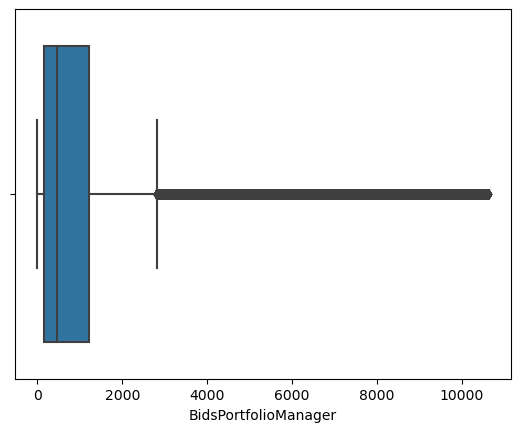

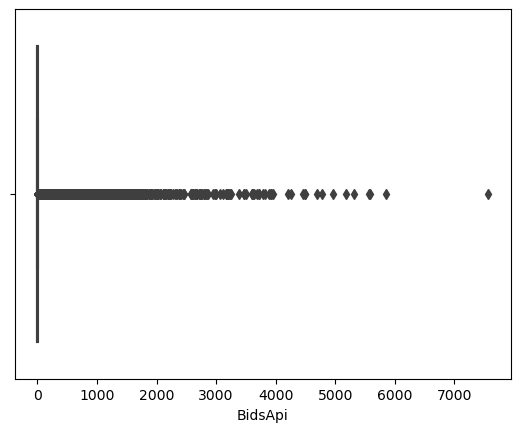

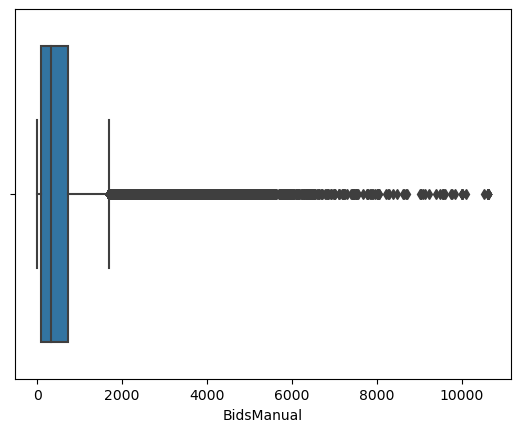

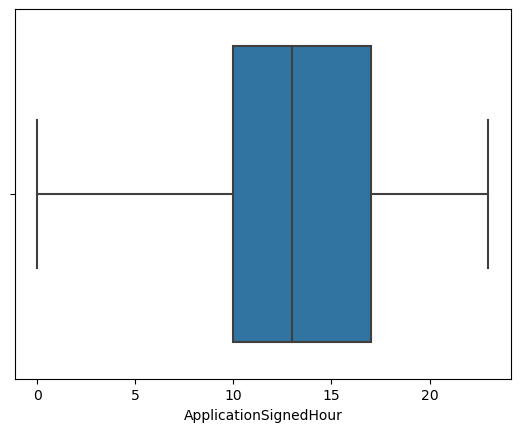

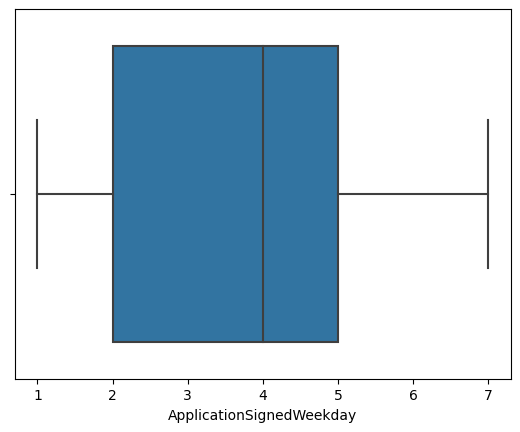

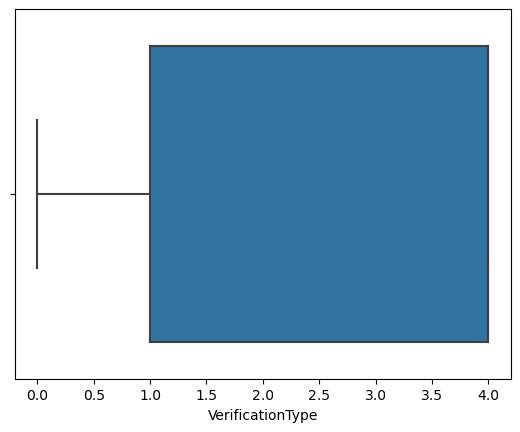

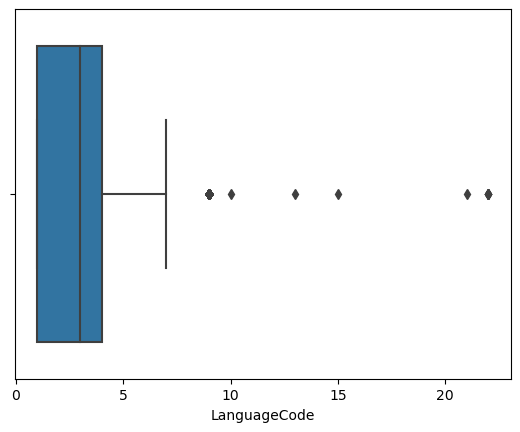

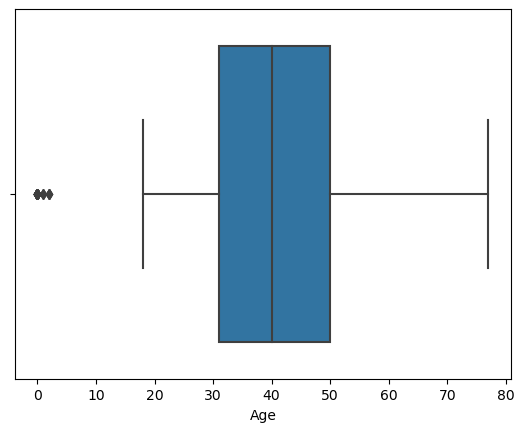

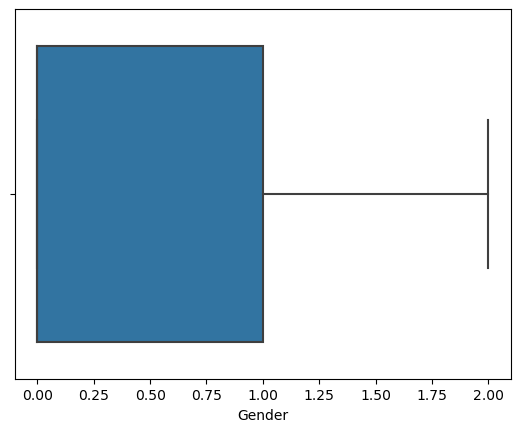

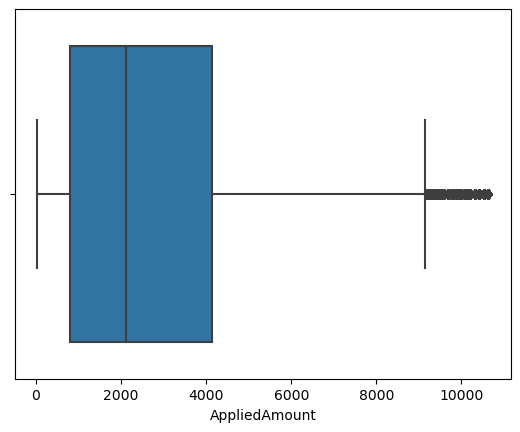

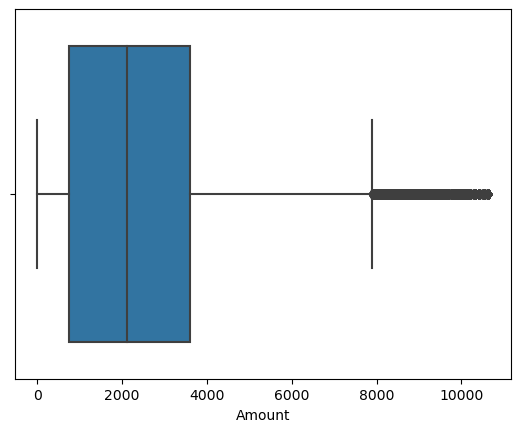

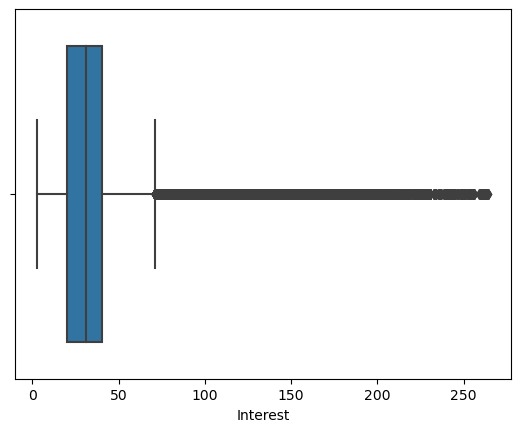

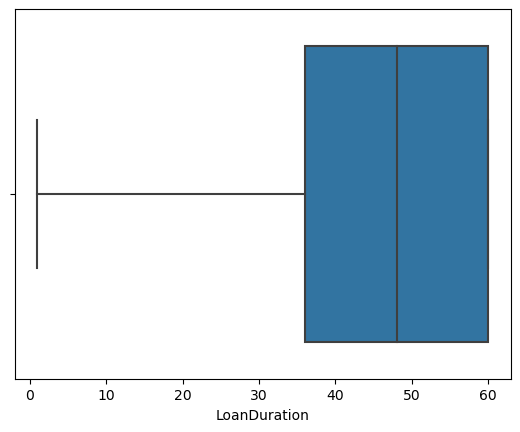

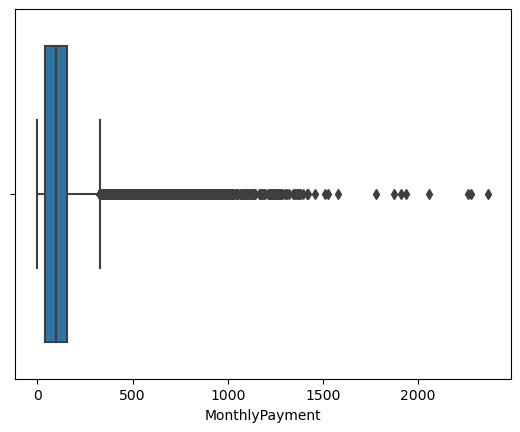

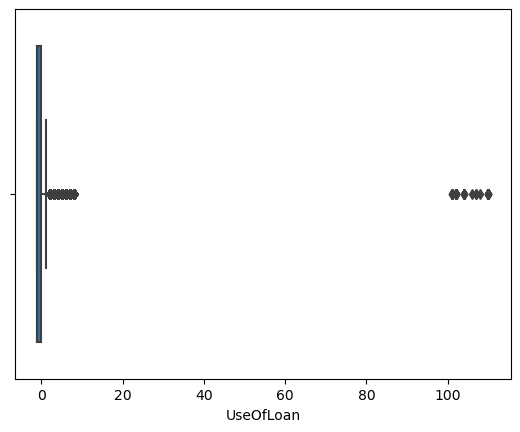

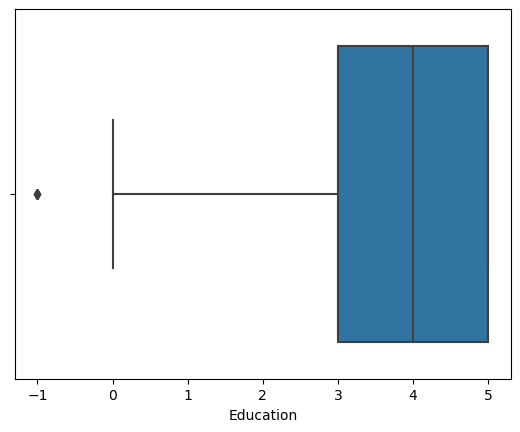

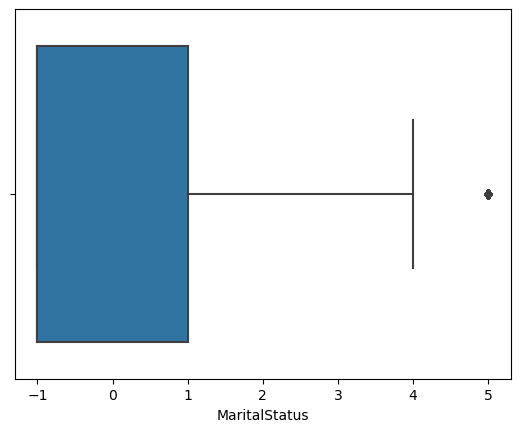

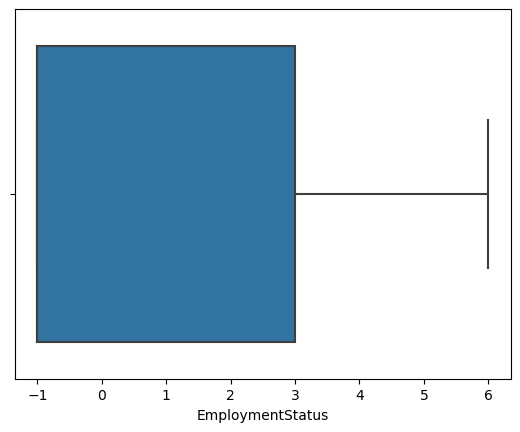

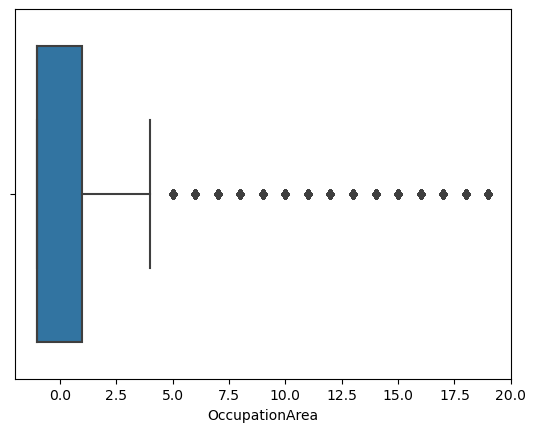

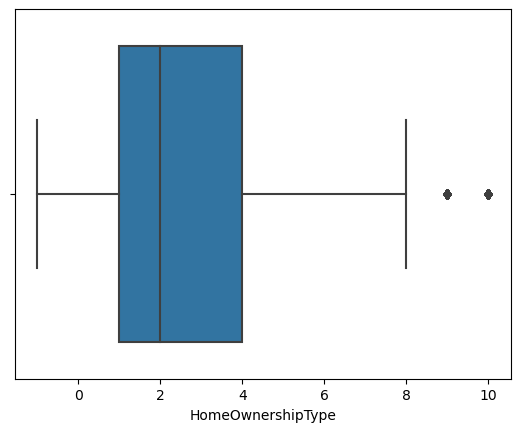

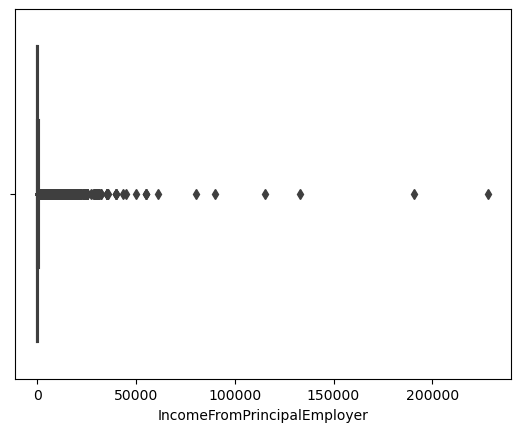

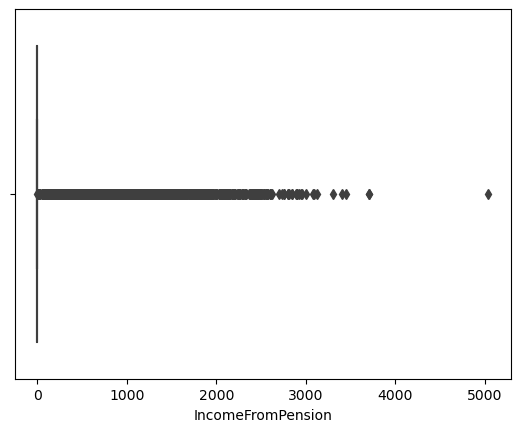

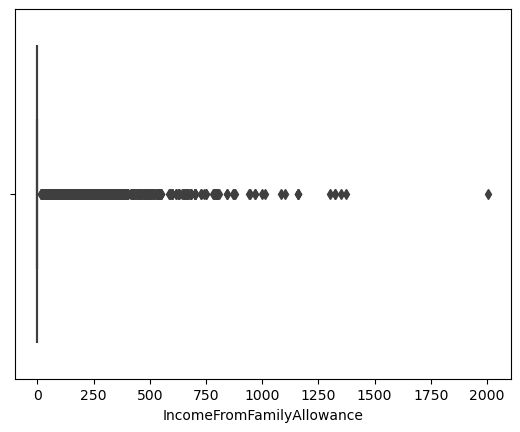

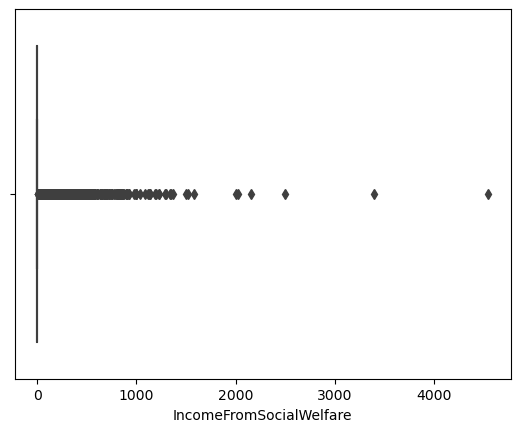

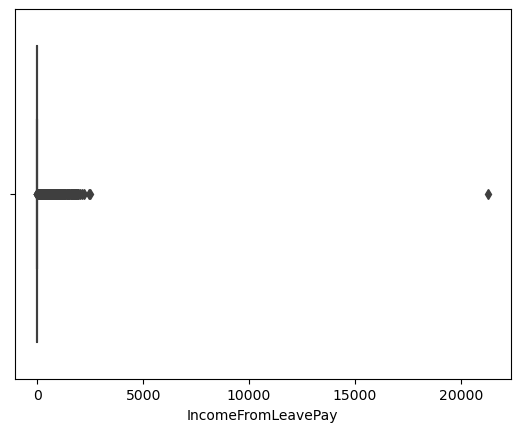

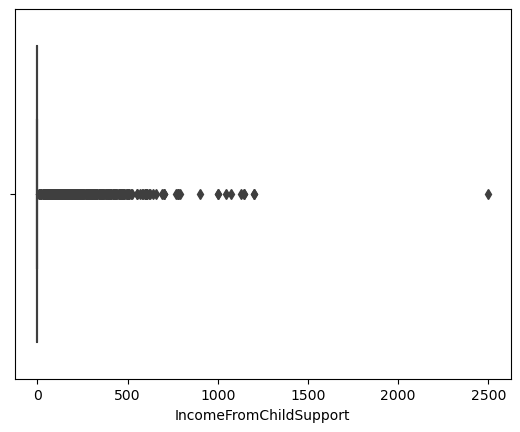

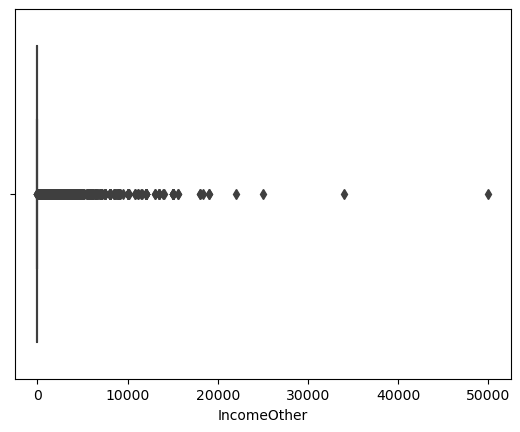

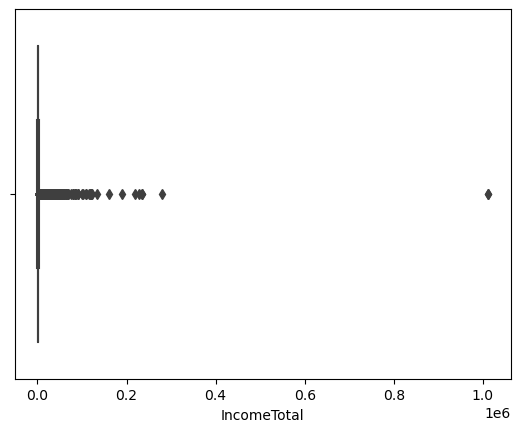

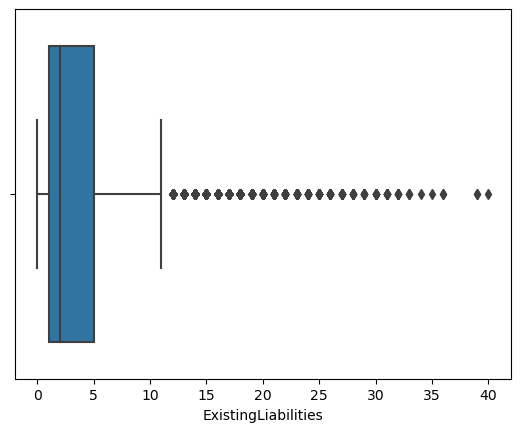

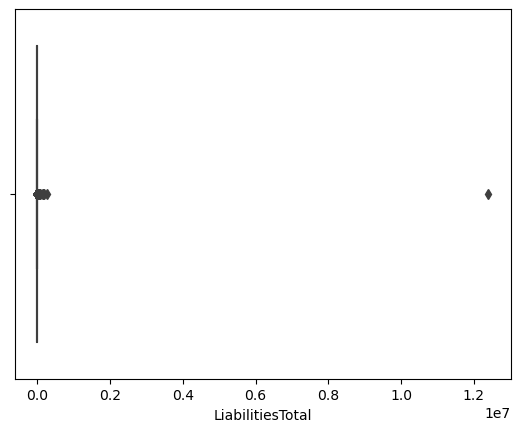

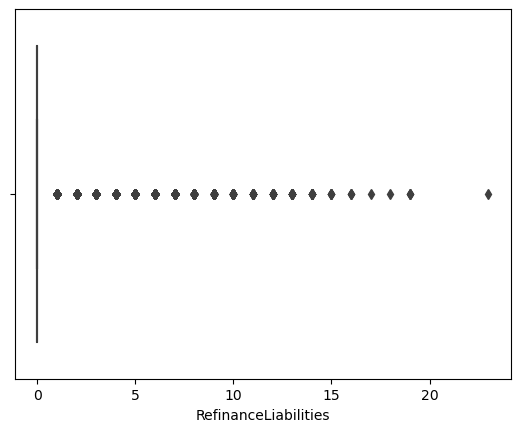

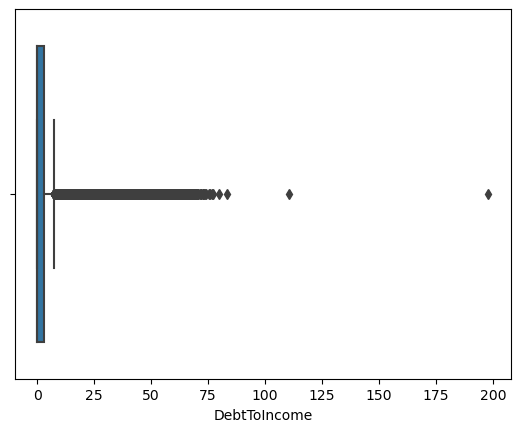

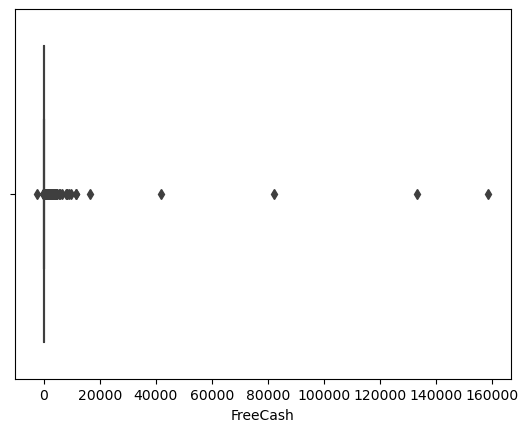

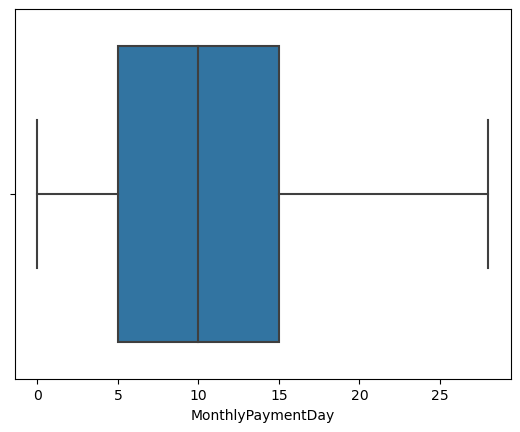

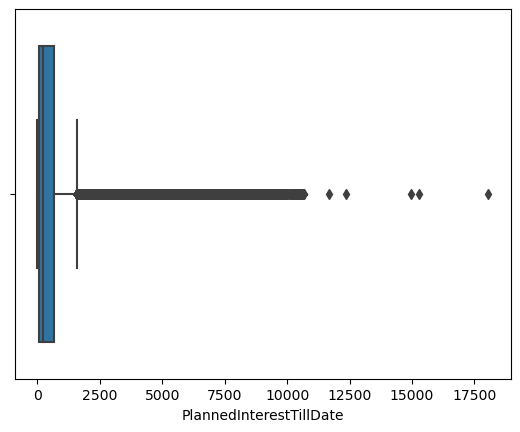

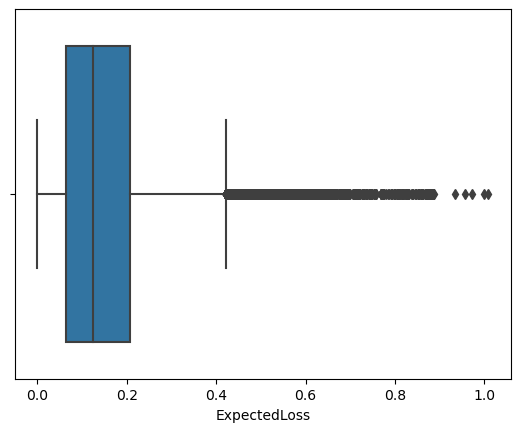

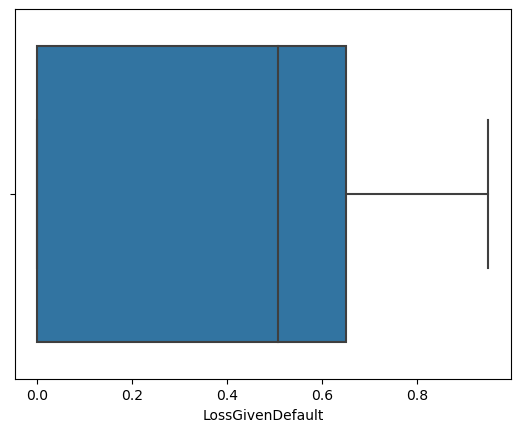

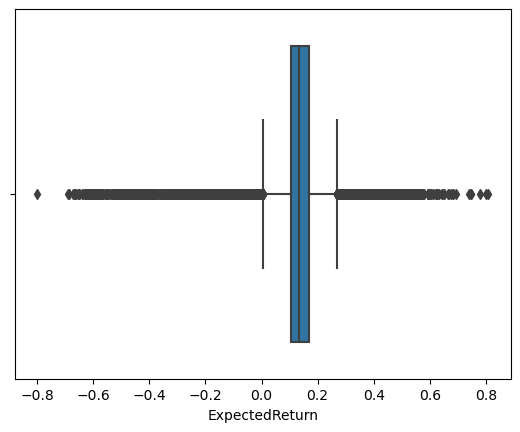

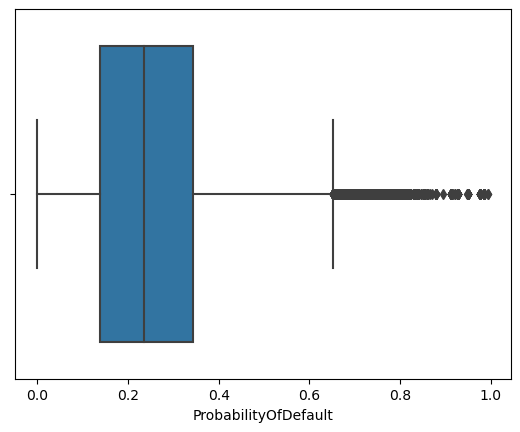

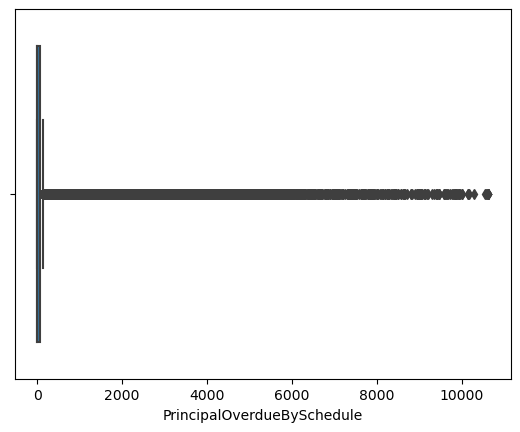

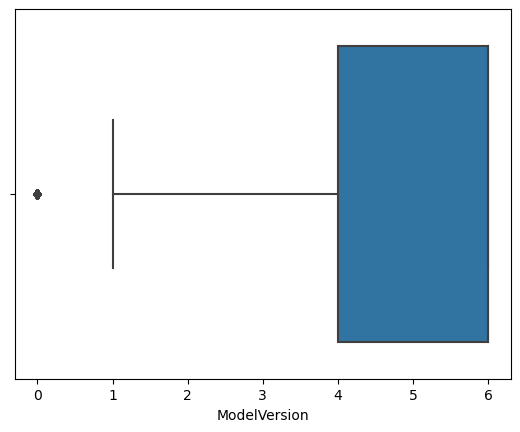

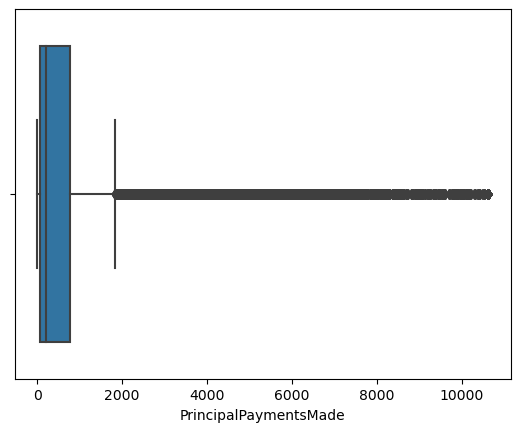

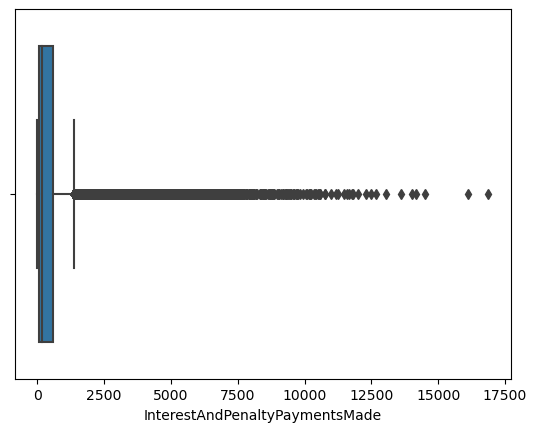

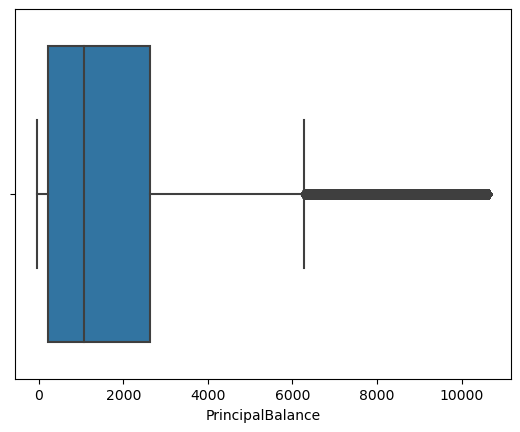

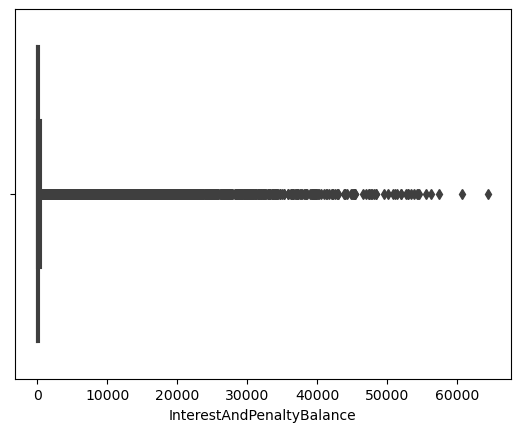

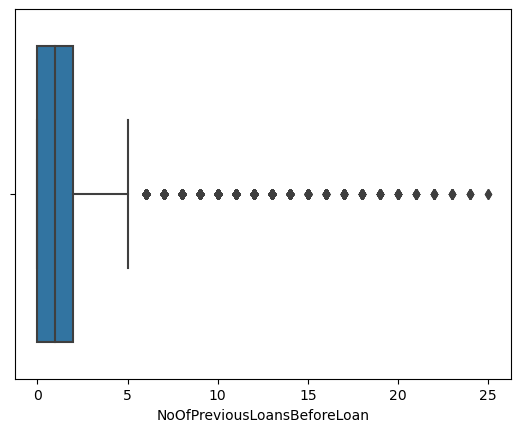

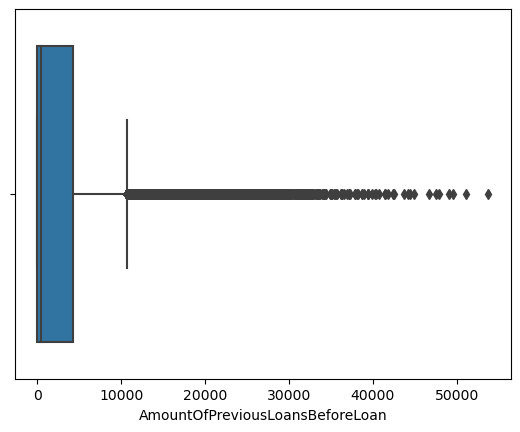

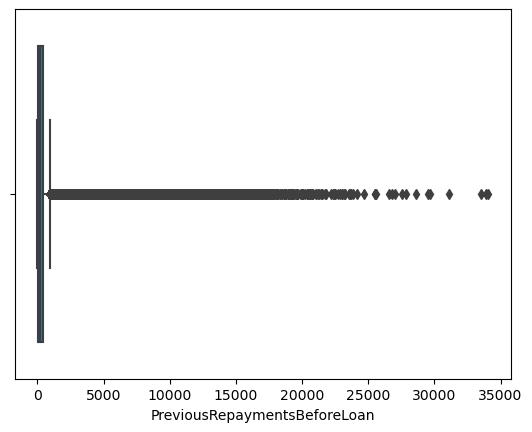

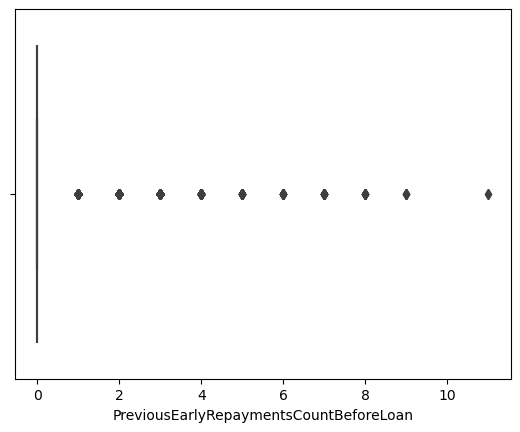

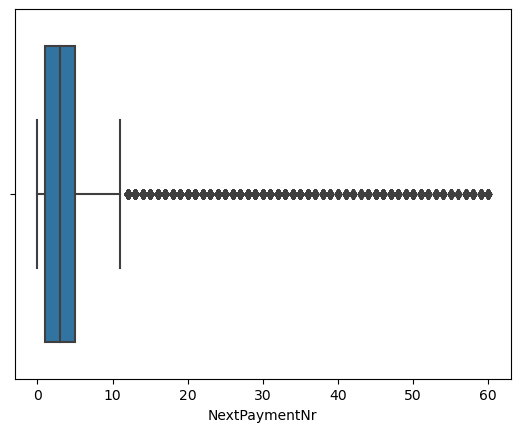

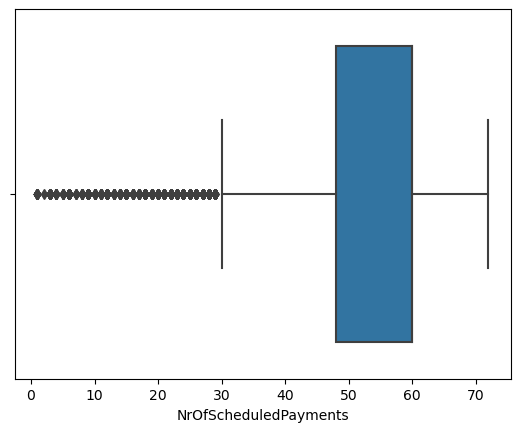

In [25]:
for i in numerical_columns:
  sns.boxplot(x=df[i])
  plt.show();

In [26]:
def remove_outliers(colu):
  sorted(colu)
  Q1,Q3 = colu.quantile([0.25,0.75])
  IQR = Q3 - Q1
  lower_limit = Q1 - (1.5*IQR)
  upper_limit = Q3 + (1.5*IQR)
  return lower_limit, upper_limit

In [27]:
for i in numerical_columns:
  low_limit_col, up_limit_col = remove_outliers(df[i])
  df[i] = np.where(df[i] > up_limit_col, up_limit_col, df[i])
  df[i] = np.where(df[i] < low_limit_col, low_limit_col, df[i])

## Exploratory Data Analysis

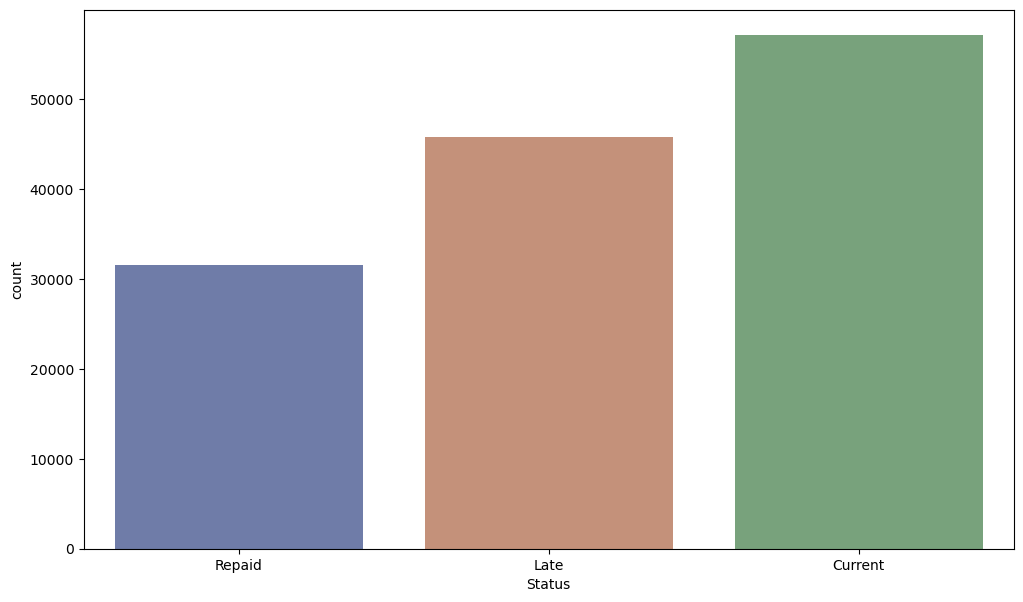

In [28]:
plt.figure(figsize=(12,7))
sns.countplot(x='Status', data =df, palette="dark", alpha=.6);

Status:  
We have 3 unique values in the Status column:
* **Repaid**: Loan repayment is the act of settling an amount borrowed from a lender along with the applicable interest amount.
* **Late**: The loan has one or more interest payments which are late. Overdue – there has been a delay of more than a day on the scheduled repayment date of the loan.
* **Current**: Current means The borrower is making payments on time. Grace period is a set number of days after the due date during which payment may be made by the borrower without penalty.


In [29]:
df['Gender'] = df['Gender'].replace({0:'Male', 1:'Female', 2:'Undefined'})

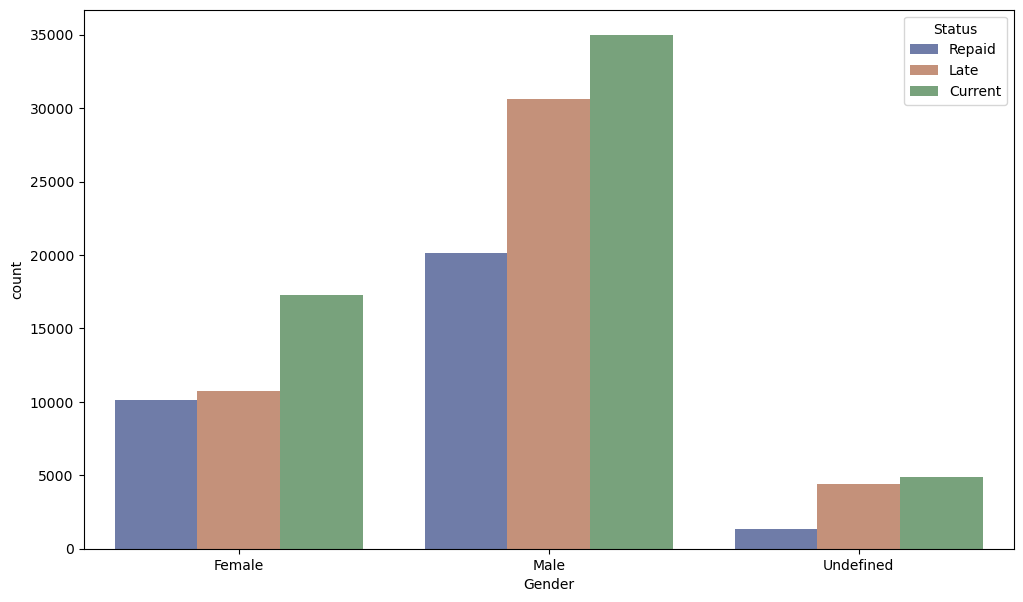

In [30]:
plt.figure(figsize=(12,7))
sns.countplot(x='Gender',hue='Status', data =df, palette="dark", alpha=.6);

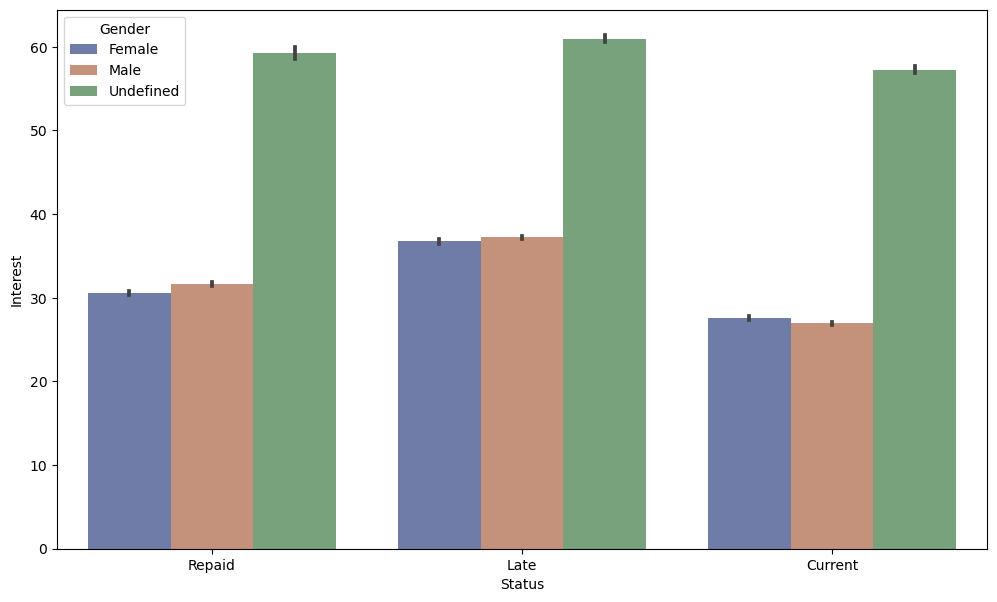

In [31]:
plt.figure(figsize=(12,7))
sns.barplot(x='Status', y='Interest', hue='Gender',data=df, palette="dark", alpha=.6);

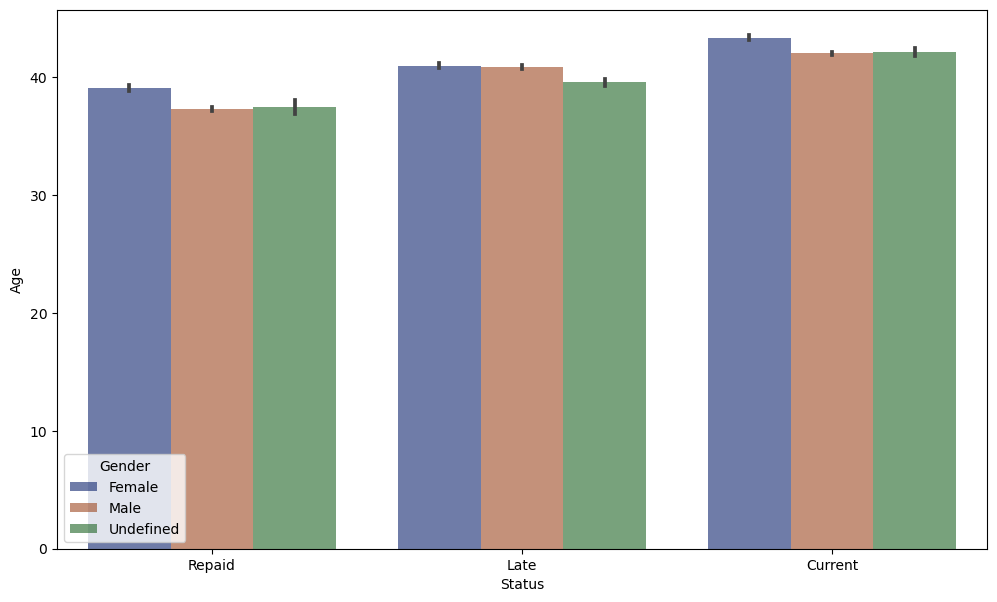

In [32]:
plt.figure(figsize=(12,7))
sns.barplot(x='Status', y='Age', hue='Gender',data=df, palette="dark", alpha=.6);

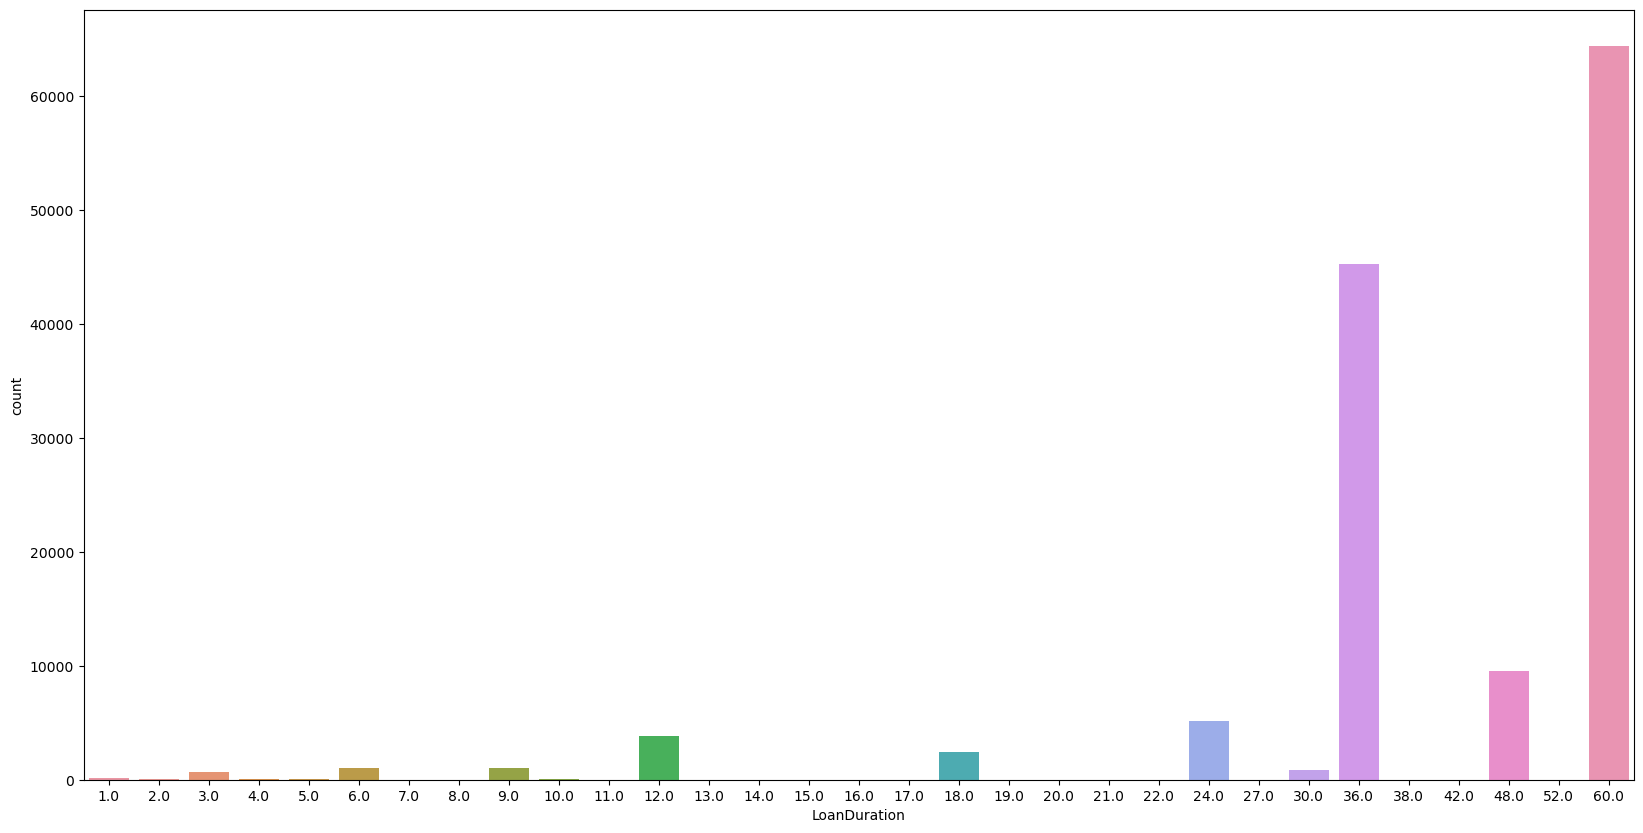

In [33]:
plt.figure(figsize=(20,10))
sns.countplot(x='LoanDuration', data =df);

Almost 50% of the Loan Duration is 60.

In [34]:
df['Country'] = df['Country'].replace({'EE':'Estonia','FI':'Finland','ES':'Spain','SK':'Slovakia'})

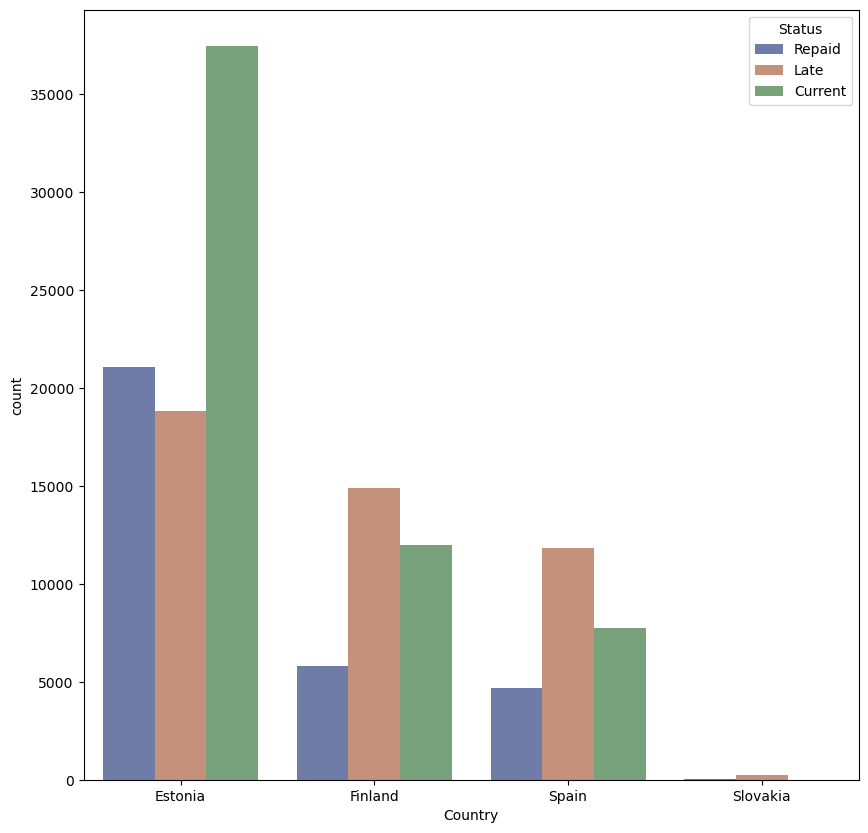

In [35]:
plt.figure(figsize=(10,10))
sns.countplot(x='Country', hue='Status', data =df, palette="dark", alpha=.6);

In [36]:
df.Education.unique()

array([3., 5., 4., 2., 1., 0.])

In [37]:
df['Education'] = df['Education'].replace({0:'No Education',1:'Primary education',2:'Basic education', 3:'Vocational education', 4:'Secondary education',5:'Higher education'})

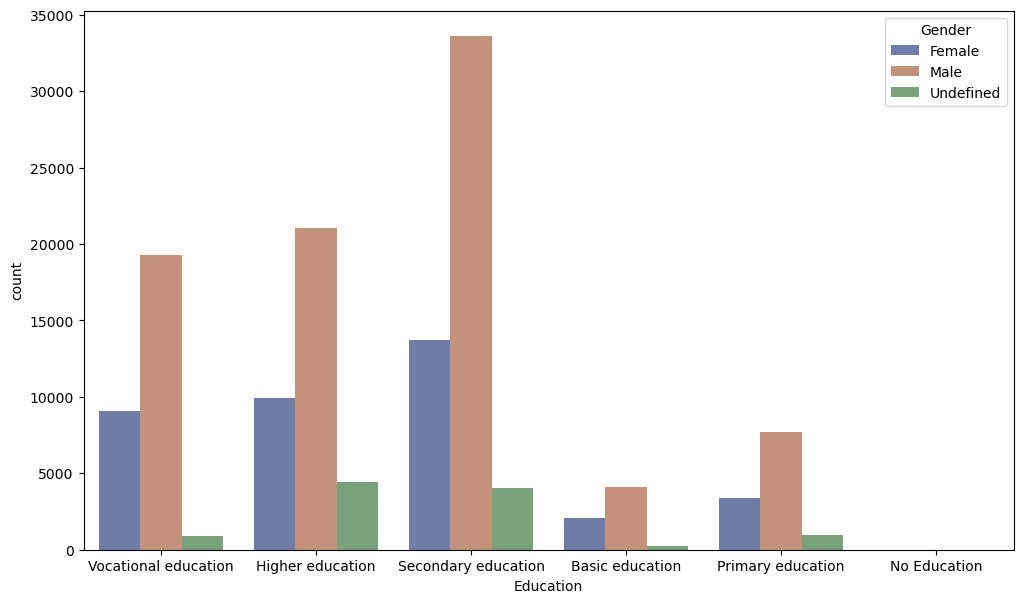

In [38]:
plt.figure(figsize=(12,7))
sns.countplot(x='Education',hue='Gender', data =df, palette="dark", alpha=.6);

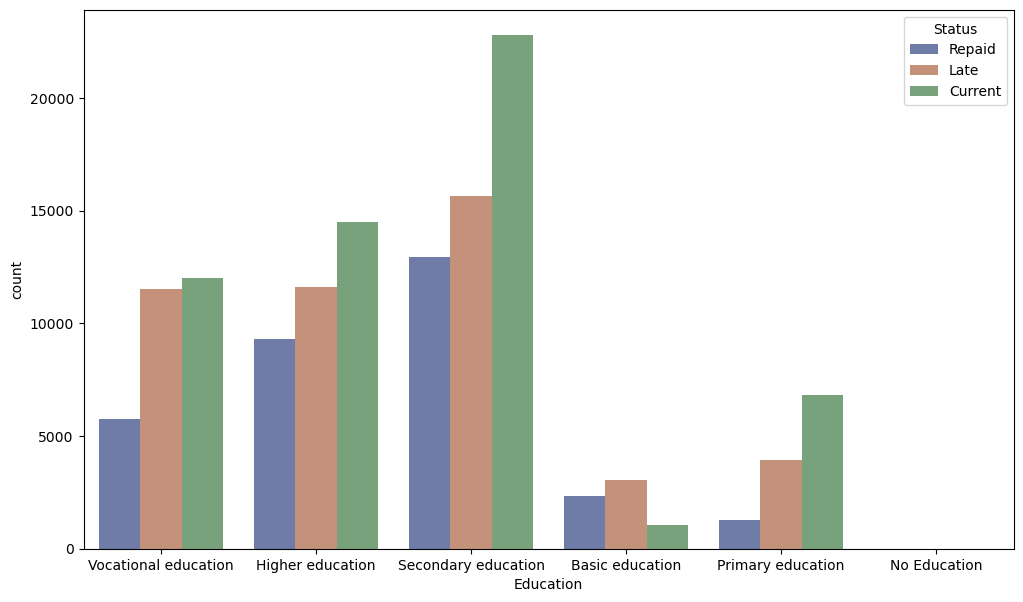

In [39]:
plt.figure(figsize=(12,7))
sns.countplot(x='Education',hue='Status', data =df, palette="dark", alpha=.6);

## Feature Engineering and Data Pre-Processing

### Pearson Correlation

The Pearson correlation measures the strength of the linear relationship between two variables. It has a value between -1 to 1, 
* -1 meaning a total negative linear correlation 
* 0 being no correlation, and + 1 meaning a total positive correlation

![Markdown](https://editor.analyticsvidhya.com/uploads/39170Formula.JPG)

C:\Users\lenonvo\AppData\Local\Temp\ipykernel_1292\957272647.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


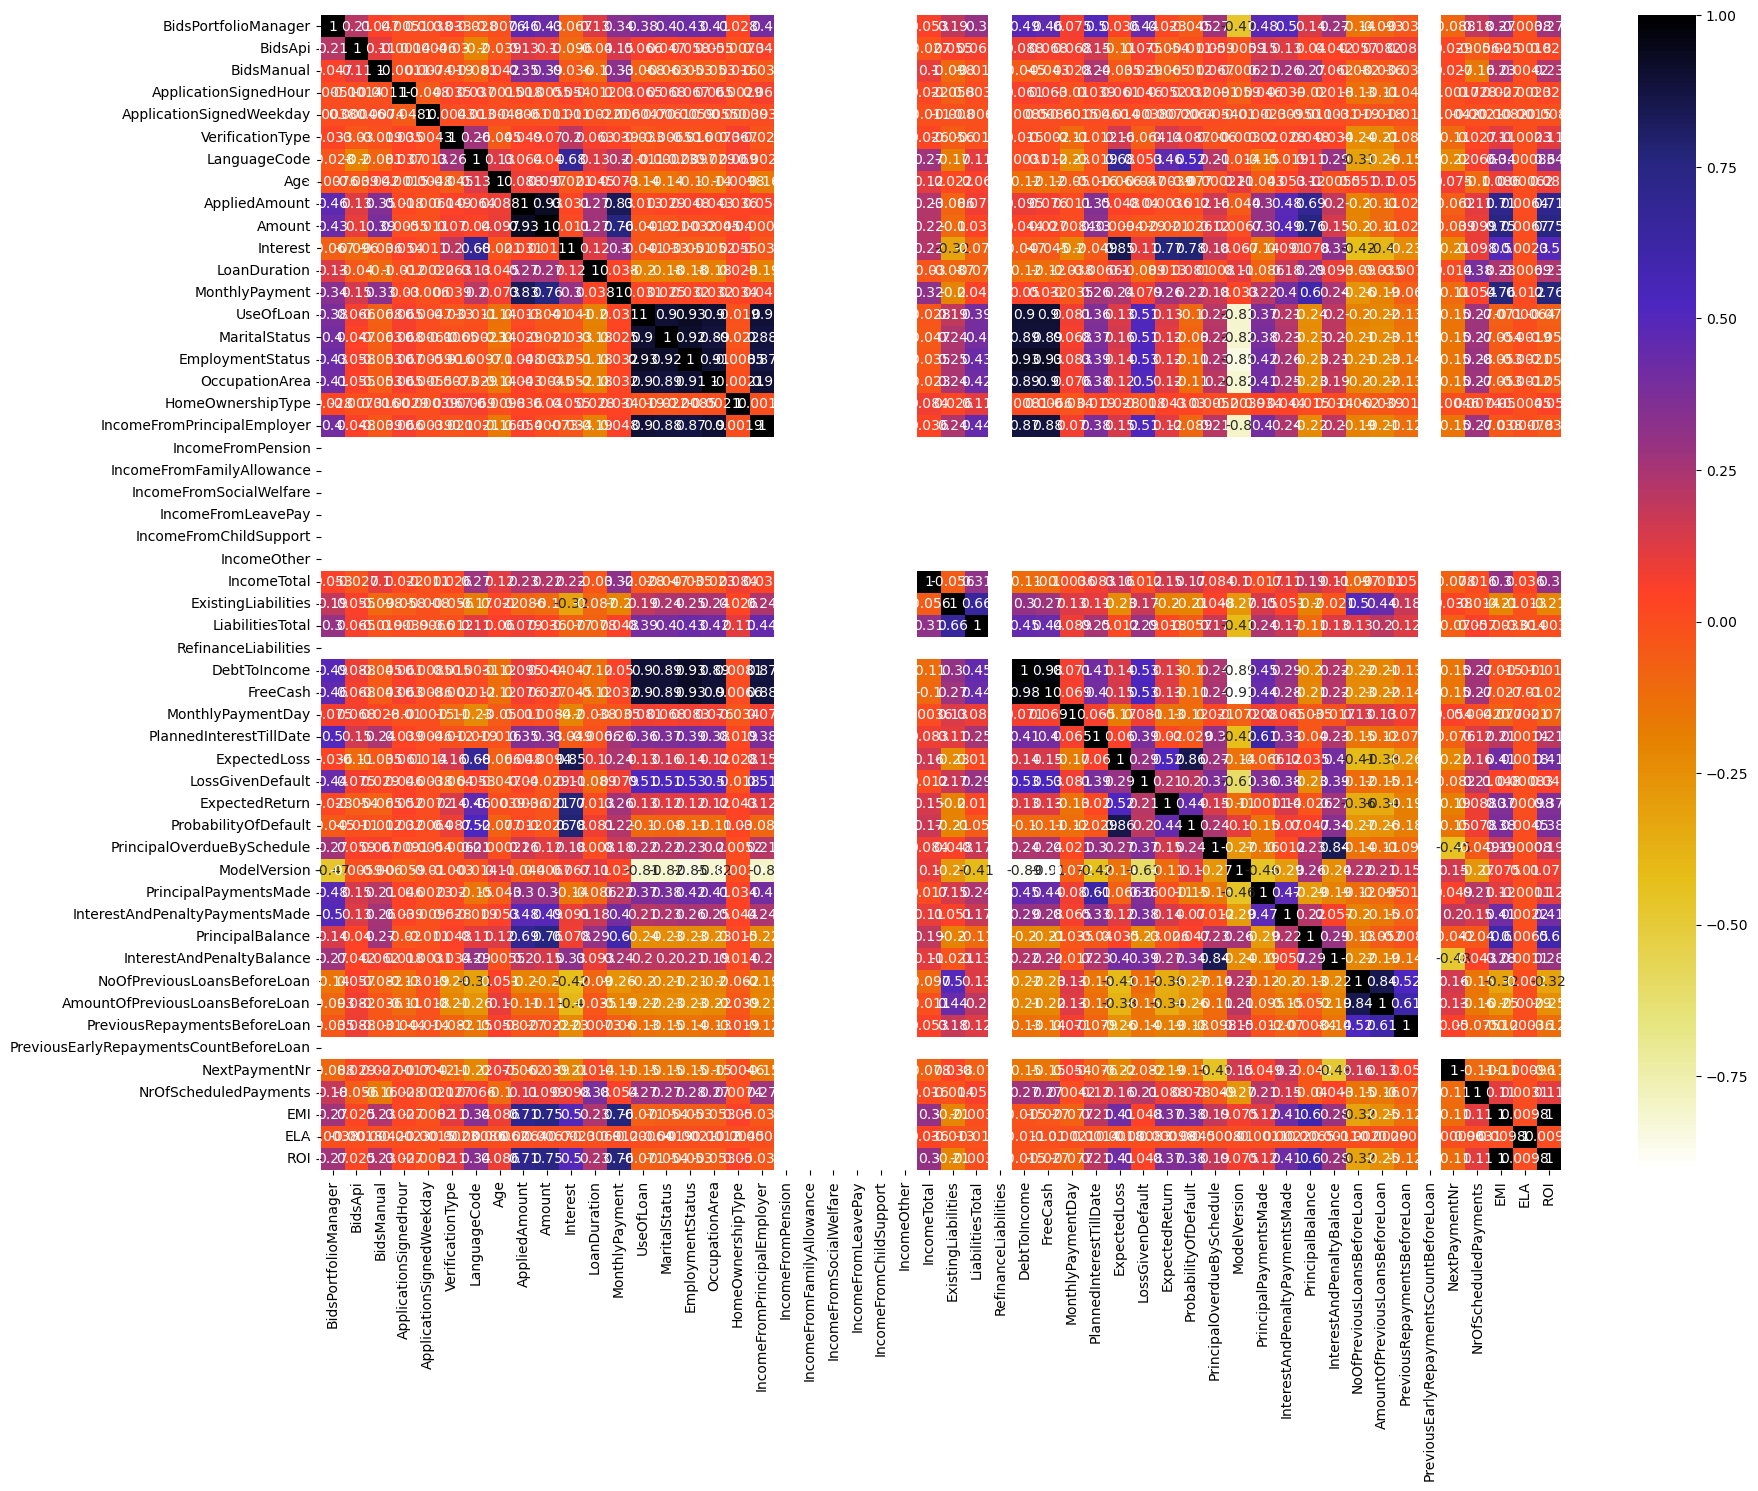

In [40]:
plt.figure(figsize = (20,15))
cor = df.corr()
sns.heatmap(cor, annot = True, cmap=plt.cm.CMRmap_r)
plt.show();

We will create a function that will select highly correlated features.

In [41]:
def correlation(data, threshold):
  feature_correlation = set()
  correlation_matrix = data.corr()
  for i in range(len(correlation_matrix.columns)):
    for j in range(i):
      if abs(correlation_matrix.iloc[i, j]) > threshold:
        column_name = correlation_matrix.columns[i]
        feature_correlation.add(column_name)
  return feature_correlation

In [42]:
highly_corr_features = correlation(df, 0.80)

C:\Users\lenonvo\AppData\Local\Temp\ipykernel_1292\1651858686.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [43]:
highly_corr_features

{'Amount',
 'AmountOfPreviousLoansBeforeLoan',
 'DebtToIncome',
 'EmploymentStatus',
 'ExpectedLoss',
 'FreeCash',
 'IncomeFromPrincipalEmployer',
 'InterestAndPenaltyBalance',
 'MaritalStatus',
 'ModelVersion',
 'MonthlyPayment',
 'OccupationArea',
 'ProbabilityOfDefault',
 'ROI'}

In [44]:
df['Status'].unique()

array(['Repaid', 'Late', 'Current'], dtype=object)

In [45]:
Current_Index = df[df['Status']=='Current']

In [46]:
Current_Index

,ReportAsOfEOD,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,...,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr,NrOfScheduledPayments,EMI,ELA,ROI
491,2020-01-27,1355.0,0.0,645.0,True,2015-01-02 08:08:53,2015-01-06,2015-02-16,2020-01-15,2021-01-15,...,0.0,0.0,0.0,0.000,0.0,11.0,56.0,48920.0,1468.00,489.20
523,2020-01-27,1000.0,0.0,0.0,False,2015-01-07 08:46:29,2015-01-07,2015-03-06,2020-02-06,2021-11-08,...,0.0,1.0,1300.0,187.870,0.0,9.0,30.0,17740.0,-767.37,177.40
536,2020-01-27,2345.0,0.0,655.0,False,2015-01-07 12:43:52,2015-01-07,2015-02-16,2020-01-14,2024-02-23,...,0.0,1.0,1000.0,623.890,0.0,11.0,60.0,53610.0,317.97,536.10
541,2020-01-27,2045.0,0.0,955.0,True,2015-01-03 12:55:15,2015-01-08,2015-02-20,2020-01-20,2021-01-04,...,0.0,0.0,0.0,0.000,0.0,1.0,30.0,83940.0,575.00,839.40
544,2020-01-27,1500.0,0.0,0.0,True,2015-01-07 14:39:33,2015-01-08,2015-02-25,2020-01-27,2020-01-27,...,0.0,0.0,0.0,0.000,0.0,3.0,60.0,43875.0,1035.00,438.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134429,2020-01-27,560.0,0.0,40.0,False,2014-12-26 18:27:55,2014-12-29,2015-02-25,2019-01-25,2022-05-25,...,0.0,2.0,7000.0,955.815,0.0,11.0,60.0,18000.0,408.67,180.00
134455,2020-01-27,2175.0,0.0,1678.5,True,2014-12-30 15:18:33,2014-12-30,2015-02-25,2020-01-27,2020-01-27,...,0.0,0.0,0.0,0.000,0.0,3.0,60.0,142100.0,15.69,1421.00
134483,2020-01-27,1000.0,0.0,0.0,True,2015-01-02 12:07:44,2015-01-02,2015-02-16,2020-01-15,2024-02-15,...,0.0,0.0,0.0,0.000,0.0,3.0,51.0,21760.0,750.00,217.60
134486,2020-01-27,635.0,0.0,1678.5,True,2014-12-31 16:20:05,2015-01-02,2015-02-12,2020-01-13,2021-12-15,...,0.0,0.0,0.0,0.000,0.0,11.0,60.0,207542.0,18.00,2075.42


In [47]:
current_Index = df[df['Status']=='Current'].index

In [48]:
data = df.drop(current_Index)

In [49]:
data['Status'].unique()

array(['Repaid', 'Late'], dtype=object)

In [50]:
data['Education'] = data['Education'].replace({'No Education':0,'Primary education':1,'Basic education':2, 'Vocational education':3, 'Secondary education':4,'Higher education':5})

In [51]:
data['Education'].unique()

array([3, 5, 4, 2, 1, 0], dtype=int64)

In [52]:
data['Status'] = data['Status'].replace({'Late':0,'Repaid':1})

In [53]:
data.shape


(77394, 74)

In [54]:
data['Gender'] = data['Gender'].replace({'Male':0, 'Female':1, 'Undefined':2})

In [55]:
data.select_dtypes(include=['int']).columns.to_list()

['Gender', 'Education', 'Status']

In [56]:
cat_features = data.select_dtypes(include=['object','bool']).columns.to_list()

In [57]:
for i in cat_features:
  print(f'{i} :', data[i].nunique())

ReportAsOfEOD : 1
NewCreditCustomer : 2
LoanApplicationStartedDate : 77343
LoanDate : 3490
FirstPaymentDate : 2123
MaturityDate_Original : 3085
MaturityDate_Last : 3294
DateOfBirth : 16080
Country : 4
County : 960
City : 6625
EmploymentDurationCurrentEmployer : 9
ActiveScheduleFirstPaymentReached : 2
LastPaymentOn : 2888
StageActiveSince : 29132
Rating : 8
Restructured : 2
WorseLateCategory : 9
CreditScoreEsMicroL : 11


In [58]:
data['City'].unique()

array(['TALLINN', 'KOHTLA-JARVE', 'PÄRNU', ..., 'GRANJA DE TORREHERMOSA',
       'BENAVENTE', 'VEĽKÉ DRŽKOVCE'], dtype=object)

In [59]:
data['LoanApplicationStartedDate'].unique()

array(['2009-06-11 16:40:39', '2009-06-10 15:48:57',
       '2009-06-05 19:12:29', ..., '2014-12-28 15:01:47',
       '2015-01-05 15:01:18', '2015-01-05 20:50:24'], dtype=object)

Remove these columns : DateOfBirth, ReportAsOfEOD, City, County

ReportAsOfEOD has only one unique value

We have the Age column which can replace the DateOfBirth column

In [60]:
data.drop(columns = ['DateOfBirth','ReportAsOfEOD', 'City', 'County'], inplace = True)

Convert String Date Columns to Date Time:

* LoanApplicationStartedDate 
* LoanDate 
* FirstPaymentDate 
* MaturityDate_Original
* MaturityDate_Last
* LastPaymentOn
* StageActiveSince


In [61]:
date_columns = ['LoanApplicationStartedDate','LoanDate','FirstPaymentDate','MaturityDate_Original','MaturityDate_Last','LastPaymentOn','StageActiveSince']
for i in date_columns:
  data[i] = pd.to_datetime(data[i], format = '%Y-%m-%d %H:%M:%S')

In [62]:
for i in date_columns:
  data[f'{i}_year'] = data[i].dt.year
  data[f'{i}_month'] = data[i].dt.month
  data[f'{i}_week'] = data[i].dt.week
  data[f'{i}_day'] = data[i].dt.day

C:\Users\lenonvo\AppData\Local\Temp\ipykernel_1292\2652098533.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data[f'{i}_week'] = data[i].dt.week
C:\Users\lenonvo\AppData\Local\Temp\ipykernel_1292\2652098533.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data[f'{i}_week'] = data[i].dt.week
C:\Users\lenonvo\AppData\Local\Temp\ipykernel_1292\2652098533.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data[f'{i}_week'] = data[i].dt.week
C:\Users\lenonvo\AppData\Local\Temp\ipykernel_1292\2652098533.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data[f'{i}_week'] = data[i].dt.week
C:\Users\lenonvo\AppData\Local\Temp\ipykernel_1292\2652098533.py:4: Futu

In [63]:
data.drop(columns= date_columns, inplace=True)

In [64]:
cat_features = data.select_dtypes(include=['object','bool']).columns.to_list()
for i in cat_features:
  print(f'{i} :', data[i].nunique())

NewCreditCustomer : 2
Country : 4
EmploymentDurationCurrentEmployer : 9
ActiveScheduleFirstPaymentReached : 2
Rating : 8
Restructured : 2
WorseLateCategory : 9
CreditScoreEsMicroL : 11


In [65]:
data = pd.get_dummies(data, drop_first = True)

### Interpreting Mutual Information Scores

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

[Reference](https://towardsdatascience.com/select-features-for-machine-learning-model-with-mutual-information-534fe387d5c8 "Mutual information")

Splitting the data into 3 datasets

Independent Variables

In [66]:
X = data.drop(columns = ['Status','ROI','ELA','EMI'], axis=1)

Dependent variables, one for the classification and one for the regression

In [67]:
y_class = data['Status']
y_reg = data[['ROI','ELA','EMI']]

In [68]:
X.head()

,BidsPortfolioManager,BidsApi,BidsManual,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,Gender,AppliedAmount,...,CreditScoreEsMicroL_M1,CreditScoreEsMicroL_M10,CreditScoreEsMicroL_M2,CreditScoreEsMicroL_M3,CreditScoreEsMicroL_M4,CreditScoreEsMicroL_M5,CreditScoreEsMicroL_M6,CreditScoreEsMicroL_M7,CreditScoreEsMicroL_M8,CreditScoreEsMicroL_M9
0,0.0,0.0,115.0410,17.0,5.0,2.0,1.0,61.0,1,319.5582,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,140.6057,20.0,4.0,2.0,1.0,48.0,1,191.7349,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,319.5580,20.0,6.0,2.0,1.0,58.0,1,319.5582,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,57.5205,12.0,7.0,2.0,1.0,23.0,1,127.8233,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,319.5582,10.0,4.0,2.0,1.0,25.0,1,319.5582,...,0,0,0,0,0,0,0,0,0,0


In [69]:
discrete_features = X.dtypes == int

In [70]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [71]:
mi_scores_classification = make_mi_scores(X, y_class, discrete_features)
mi_scores_classification

InterestAndPenaltyBalance                        0.680796
PrincipalBalance                                 0.664526
PrincipalPaymentsMade                            0.499531
PrincipalOverdueBySchedule                       0.465003
NextPaymentNr                                    0.403286
                                                   ...   
IncomeFromFamilyAllowance                        0.000000
IncomeFromLeavePay                               0.000000
EmploymentDurationCurrentEmployer_TrialPeriod    0.000000
FirstPaymentDate_month                           0.000000
CreditScoreEsMicroL_M9                           0.000000
Name: MI Scores, Length: 118, dtype: float64

In [72]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

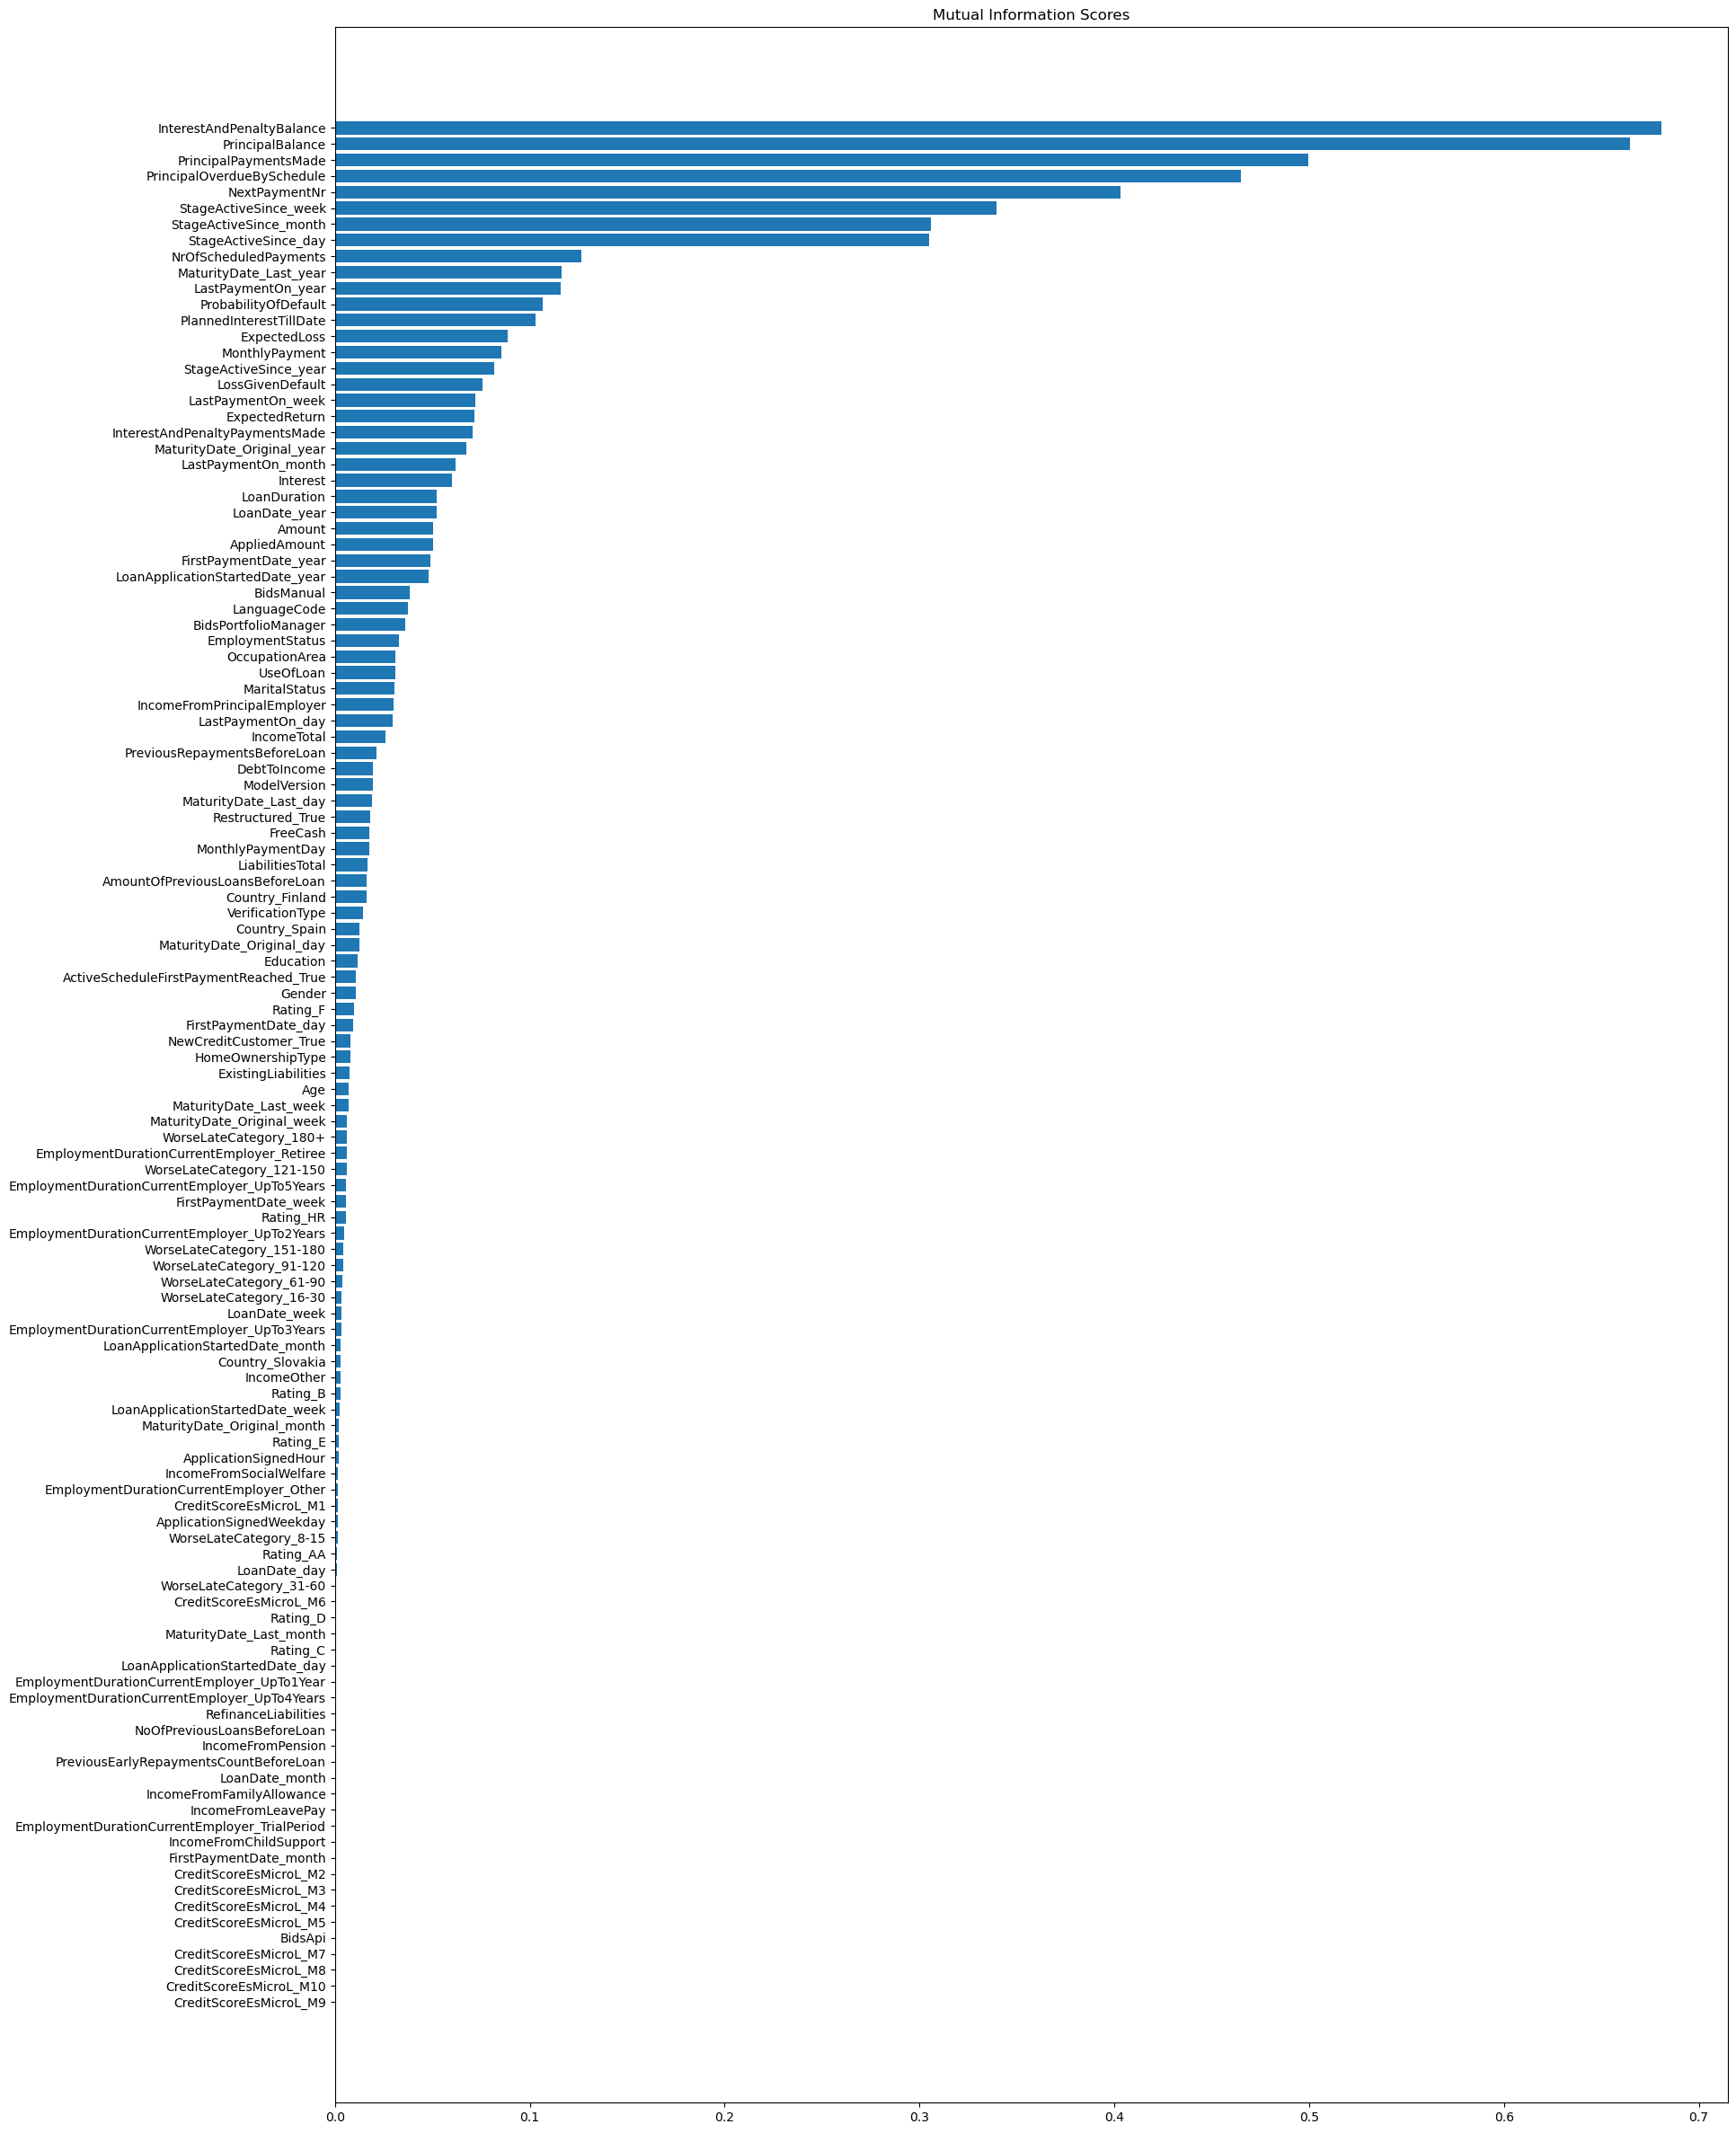

In [73]:
plt.figure(figsize=(20, 30))
plot_mi_scores(mi_scores_classification)

Removing columns with a mutual information score less than 0.05

In [74]:
col = ['Amount','Interest','IncomeTotal','LiabilitiesTotal','LoanDuration']
low_mi_score_col = []
for i in X.columns:
  if i in col:
    pass
  elif mi_scores_classification[i] < 0.05:
    print(f'Removing the {i} column')
    low_mi_score_col.append(i)
    X.drop(columns = [i], inplace = True)

Removing the BidsPortfolioManager column
Removing the BidsApi column
Removing the BidsManual column
Removing the ApplicationSignedHour column
Removing the ApplicationSignedWeekday column
Removing the VerificationType column
Removing the LanguageCode column
Removing the Age column
Removing the Gender column
Removing the UseOfLoan column
Removing the Education column
Removing the MaritalStatus column
Removing the EmploymentStatus column
Removing the OccupationArea column
Removing the HomeOwnershipType column
Removing the IncomeFromPrincipalEmployer column
Removing the IncomeFromPension column
Removing the IncomeFromFamilyAllowance column
Removing the IncomeFromSocialWelfare column
Removing the IncomeFromLeavePay column
Removing the IncomeFromChildSupport column
Removing the IncomeOther column
Removing the ExistingLiabilities column
Removing the RefinanceLiabilities column
Removing the DebtToIncome column
Removing the FreeCash column
Removing the MonthlyPaymentDay column
Removing the Mode

In [75]:
X.shape

(77394, 29)

In [76]:
X.columns

Index(['AppliedAmount', 'Amount', 'Interest', 'LoanDuration', 'MonthlyPayment',
       'IncomeTotal', 'LiabilitiesTotal', 'PlannedInterestTillDate',
       'ExpectedLoss', 'LossGivenDefault', 'ExpectedReturn',
       'ProbabilityOfDefault', 'PrincipalOverdueBySchedule',
       'PrincipalPaymentsMade', 'InterestAndPenaltyPaymentsMade',
       'PrincipalBalance', 'InterestAndPenaltyBalance', 'NextPaymentNr',
       'NrOfScheduledPayments', 'LoanDate_year', 'MaturityDate_Original_year',
       'MaturityDate_Last_year', 'LastPaymentOn_year', 'LastPaymentOn_month',
       'LastPaymentOn_week', 'StageActiveSince_year', 'StageActiveSince_month',
       'StageActiveSince_week', 'StageActiveSince_day'],
      dtype='object')

Selecting the top 10 highly correlated features for the machine learning models

In [77]:
X_deploy_columns = mi_scores_classification.keys()[:10].to_list()

In [78]:
type(X_deploy_columns)

list

In [79]:
l = ['Amount','Interest','IncomeTotal','LiabilitiesTotal','LoanDuration']
for i in l:
    X_deploy_columns.append(i)

In [80]:
X_deploy_columns

['InterestAndPenaltyBalance',
 'PrincipalBalance',
 'PrincipalPaymentsMade',
 'PrincipalOverdueBySchedule',
 'NextPaymentNr',
 'StageActiveSince_week',
 'StageActiveSince_month',
 'StageActiveSince_day',
 'NrOfScheduledPayments',
 'MaturityDate_Last_year',
 'Amount',
 'Interest',
 'IncomeTotal',
 'LiabilitiesTotal',
 'LoanDuration']

In [81]:
len(X_deploy_columns)

15

In [82]:
X_deploy = data[X_deploy_columns]

In [83]:
X_deploy.head()

,InterestAndPenaltyBalance,PrincipalBalance,PrincipalPaymentsMade,PrincipalOverdueBySchedule,NextPaymentNr,StageActiveSince_week,StageActiveSince_month,StageActiveSince_day,NrOfScheduledPayments,MaturityDate_Last_year,Amount,Interest,IncomeTotal,LiabilitiesTotal,LoanDuration
0,0.00,0.00,115.0408,0.00,3.0,6,2,8,60.0,2010,115.0408,30.0,3464.5,0.0,12.0
1,0.00,0.00,140.6057,0.00,3.0,6,2,8,60.0,2009,140.6057,25.0,3464.5,0.0,1.0
2,414.07,116.35,203.1909,116.35,3.0,9,3,3,60.0,2014,319.5409,25.0,3464.5,0.0,20.0
3,0.00,0.00,57.5205,0.00,3.0,6,2,8,60.0,2010,57.5205,45.0,3464.5,0.0,15.0
4,0.00,0.00,319.5436,0.00,3.0,6,2,8,60.0,2010,319.5436,30.0,3464.5,0.0,12.0


## Machine Learning Modeling

### Classification Models

Splitting the data into train and test sets

In [84]:
x_train, x_test, y_train, y_test = train_test_split(X_deploy, y_class, test_size = 0.2, random_state=42)

#### Logistic Regression 

In [85]:
clf = LogisticRegression()
Logistic_Reg_Pipeline = Pipeline([
    ('scale', Normalizer()),
    ('classifier', clf)
])
Logistic_Reg_Pipeline.fit(x_train, y_train)

y_pred = Logistic_Reg_Pipeline.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [86]:
def confusionMatrixVisualization(cm):
    group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
    group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    group_percentage = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1,v2,v3 in zip(group_names, group_counts, group_percentage)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize=(10,7))
    s = sns.heatmap(cm, annot=labels, fmt='',cmap='Blues')
    s.set(xlabel ='Predicted Label', ylabel ='True Label', title ='Confusion Matrix')
    plt.show()

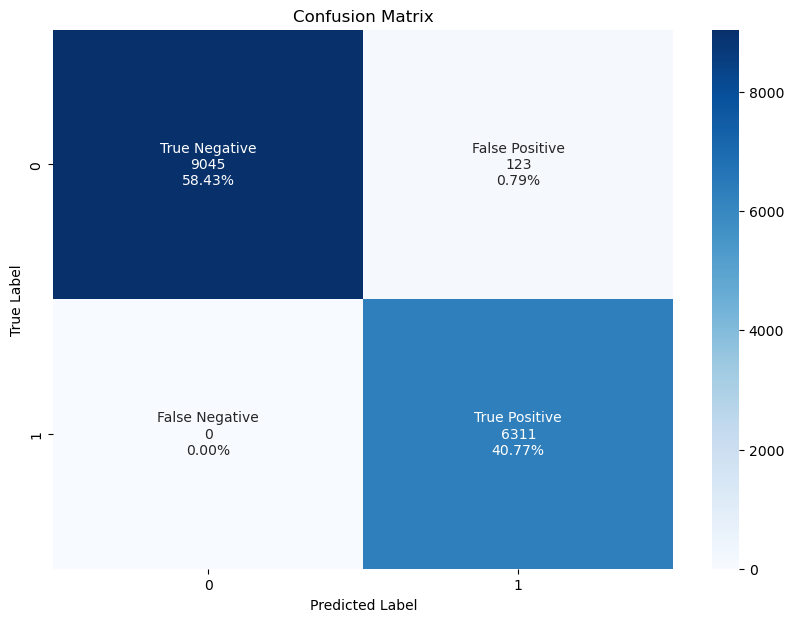

In [87]:
cm = confusion_matrix(y_test, y_pred)
confusionMatrixVisualization(cm)

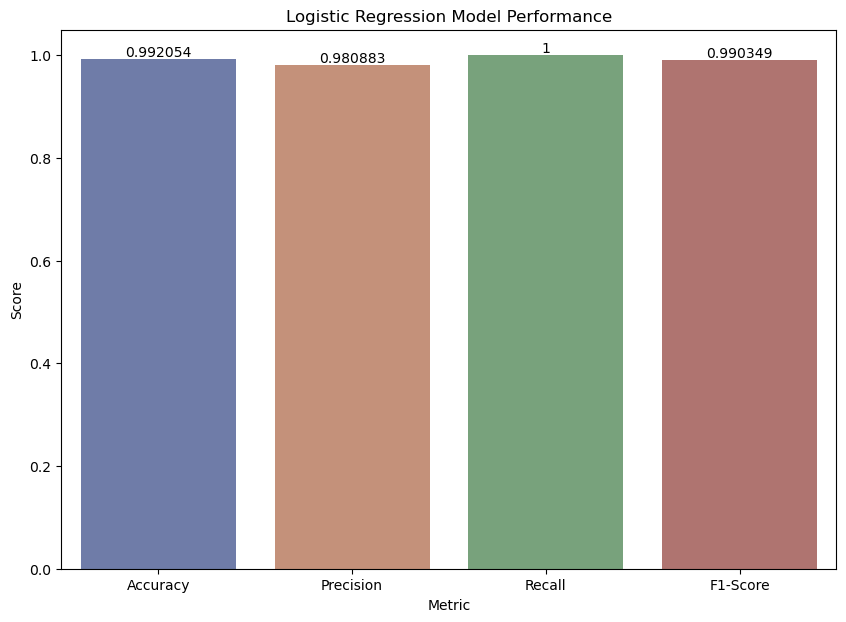

In [88]:
Metric = {'x':['Accuracy', 'Precision', 'Recall', 'F1-Score'] , 'y': [accuracy, precision, recall, f1]}
plt.figure(figsize=(10,7))
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Logistic Regression Model Performance')
ax = sns.barplot(x='x',y='y', data = Metric, palette="dark", alpha=.6)
ax.bar_label(ax.containers[0])
plt.show()

#### Random Forest Classifier

In [89]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

Model_class_Pipeline = Pipeline([
    ('scale', Normalizer()),
    ('classifier', classifier_rf)
])

Model_class_Pipeline.fit(x_train, y_train)

Pipeline(steps=[('scale', Normalizer()),
                ('classifier',
                 RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True,
                                        random_state=42))])

In [90]:
y_pred = Model_class_Pipeline.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

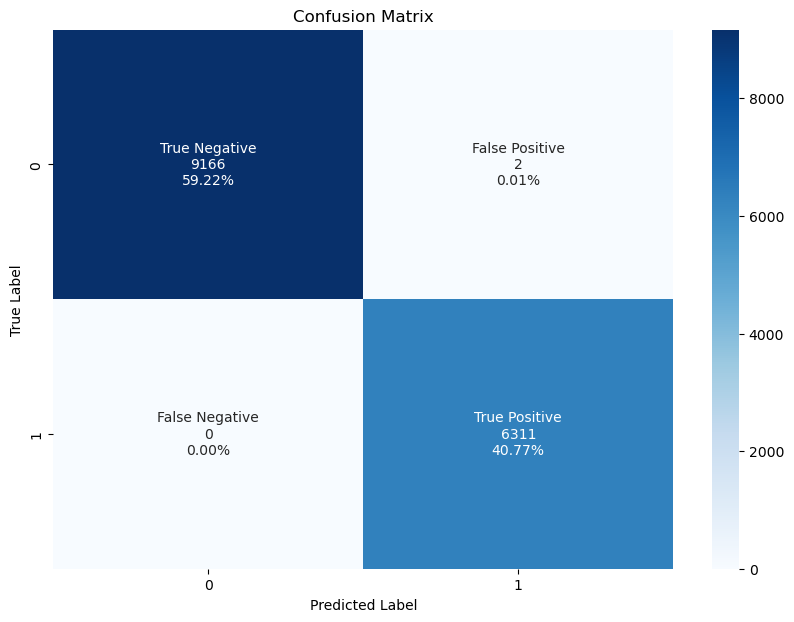

In [91]:
cm = confusion_matrix(y_test, y_pred)
confusionMatrixVisualization(cm)

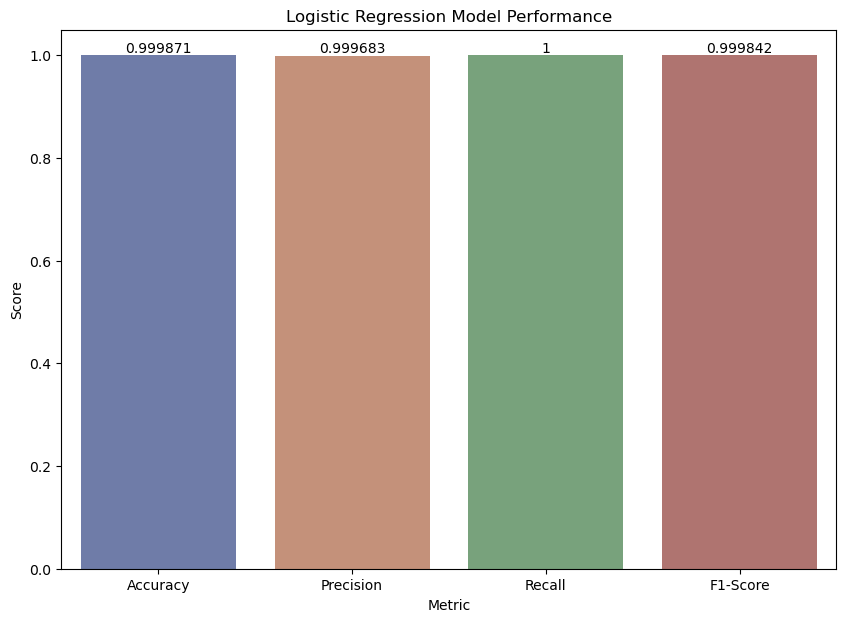

In [92]:
Metric = {'x':['Accuracy', 'Precision', 'Recall', 'F1-Score'] , 'y': [accuracy, precision, recall, f1]}
plt.figure(figsize=(10,7))
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Logistic Regression Model Performance')
ax = sns.barplot(x='x',y='y', data = Metric, palette="dark", alpha=.6)
ax.bar_label(ax.containers[0])
plt.show()

In [93]:
with open('classfication_model_pipeline','wb') as f:
    pickle.dump(Model_class_Pipeline,f) 

### Regression

Splitting the data into train and test sets

In [94]:
x_train, x_test, y_train_reg, y_test_reg = train_test_split(X_deploy, y_reg, test_size = 0.2, random_state=42)

#### Linear Regression

In [95]:
reg = LinearRegression()
Linear_Reg_Pipeline = Pipeline([
    ('scale', Normalizer()),
    ('classifier', reg)
])
Linear_Reg_Pipeline.fit(x_train, y_train_reg)
y_pred = Linear_Reg_Pipeline.predict(x_test)

In [96]:
def Eval(colu, rng = 200):
  for count, c in enumerate(colu):
    exec(f'y_pred_{c} = []')
    for i in range(rng):
      exec(f'y_pred_{c}.append(y_pred[i][count])')
  for j in colu:
    plt.figure(figsize=(12, 8))
    plt.plot([i for i in range(len(y_test_reg[f'{j}'][:rng]))],np.array(y_test_reg[f'{j}'][:rng]), c='g', label=f"{j} actual values")
    plt.plot([i for i in range(len(y_test_reg[f'{j}'][:rng]))], eval(f'y_pred_{j}'), c='m',label=f"{j} predicted values")
    plt.legend()
    plt.show()

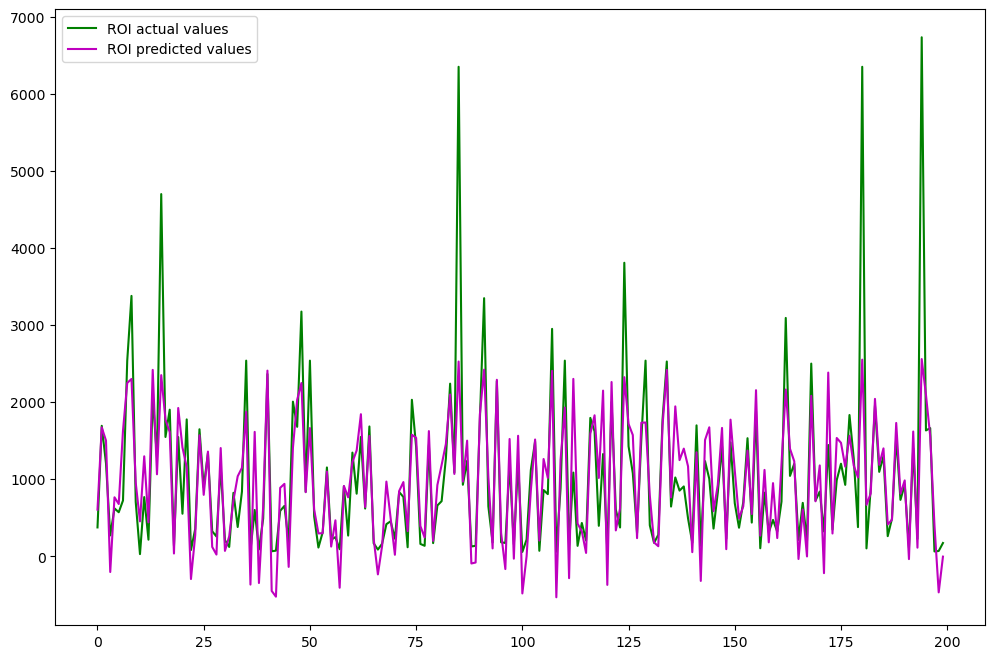

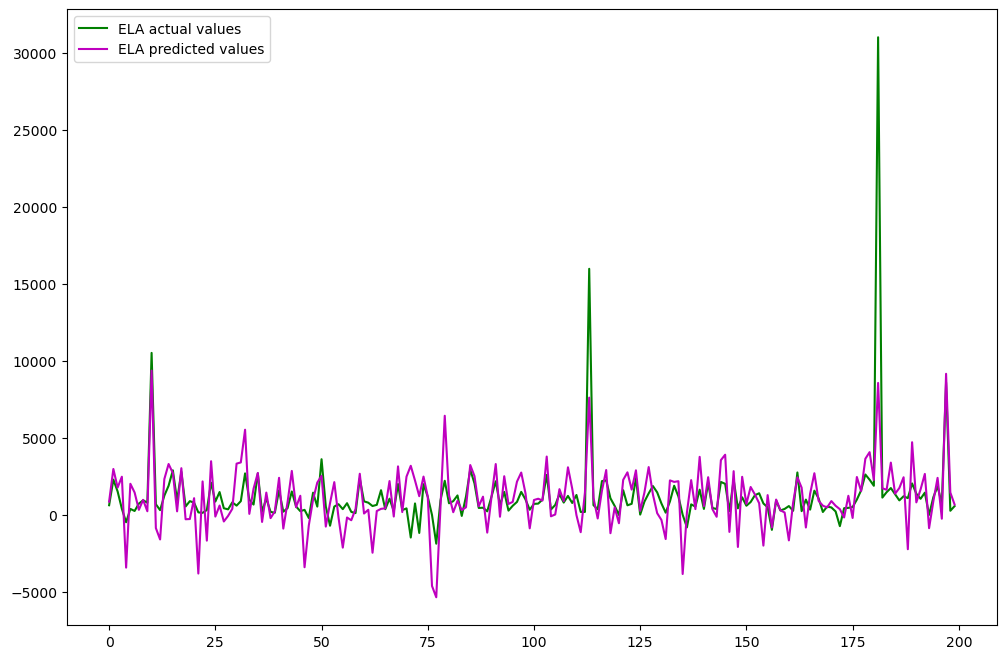

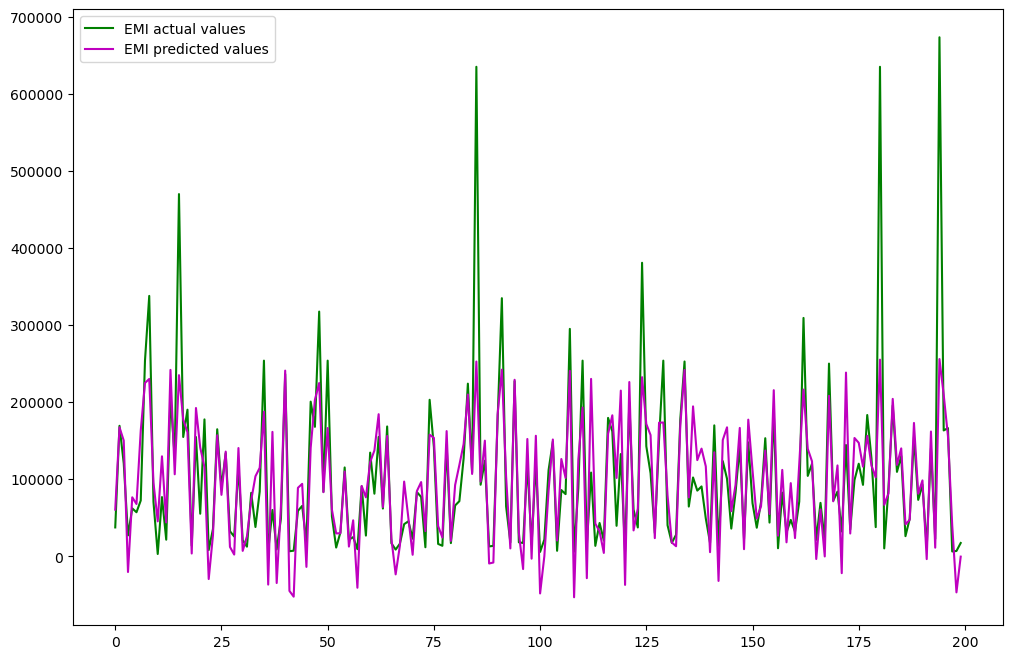

In [97]:
colu = list(y_test_reg.columns.values)
Eval(colu)

In [98]:
# MSA
print(mean_absolute_error(y_test_reg, y_pred))

11955.674408431243


In [99]:
# MSE
print(mean_squared_error(y_test_reg, y_pred))

1003713881.7759043


In [100]:
# RMSE
print(np.sqrt(mean_squared_error(y_test_reg, y_pred)))

31681.4438082595


In [101]:
r2_score(y_test_reg, y_pred)

0.47831759616935904

#### Ridge

In [102]:
Model_Reg_Pipeline = Pipeline([
    ('scale', Normalizer()),
    ('classifier', Ridge())
])
Model_Reg_Pipeline.fit(x_train, y_train_reg)

Pipeline(steps=[('scale', Normalizer()), ('classifier', Ridge())])

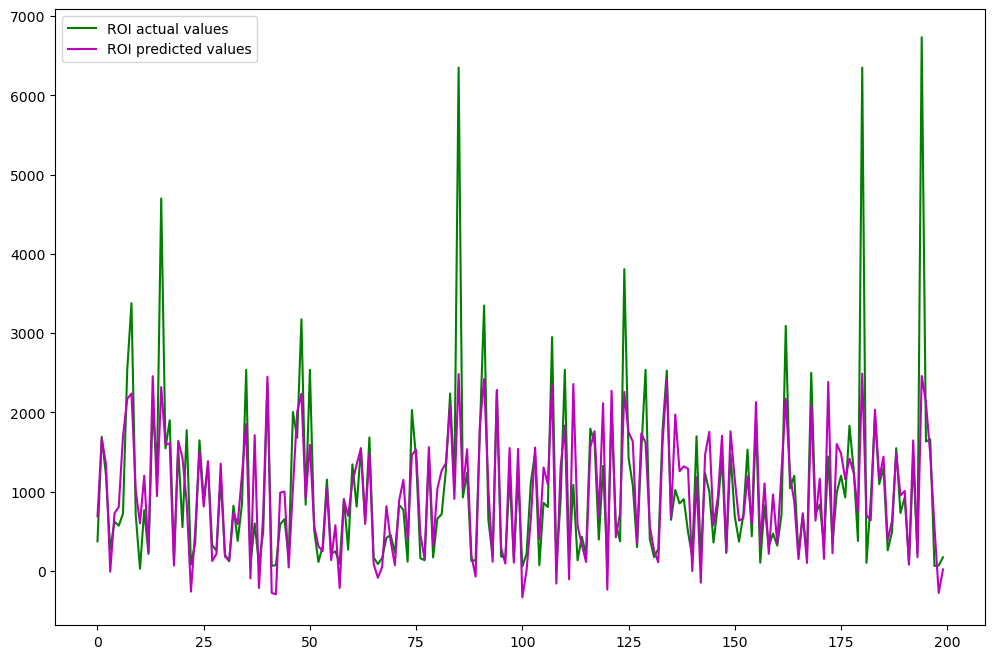

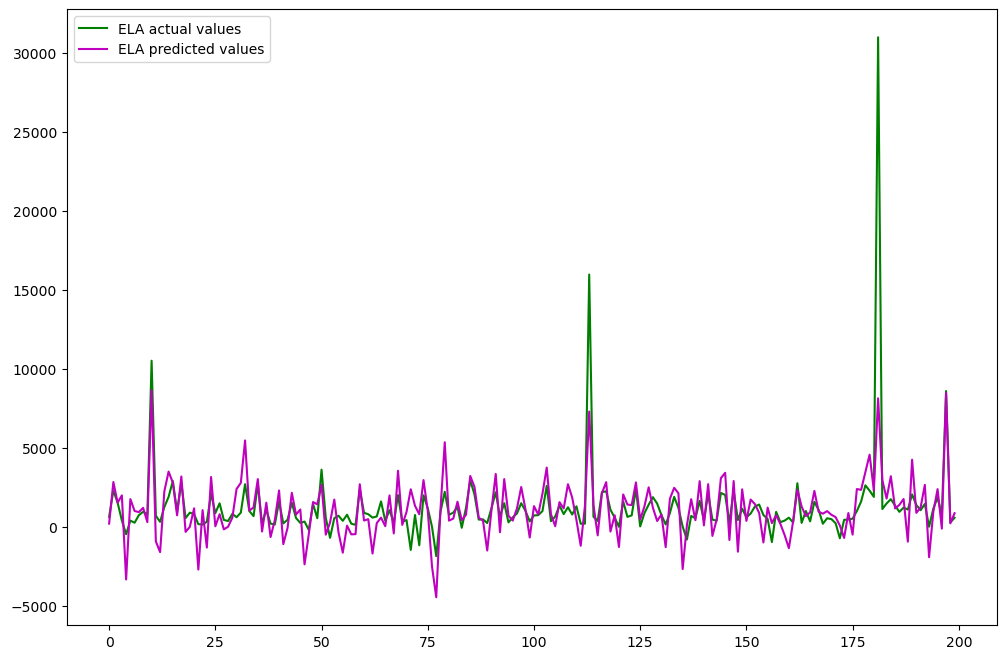

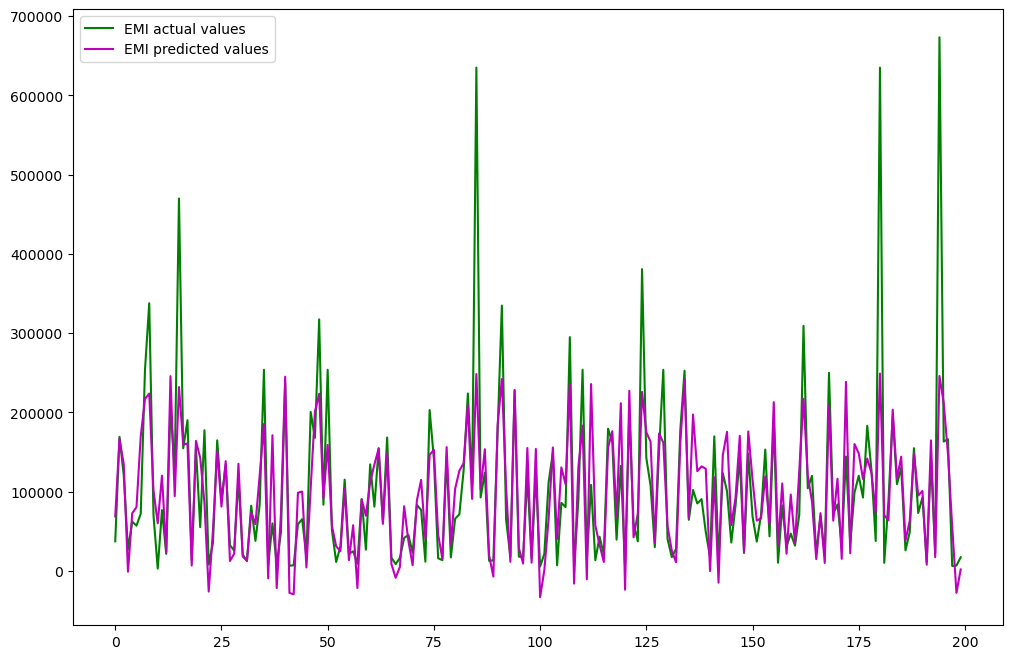

In [103]:
y_pred = Model_Reg_Pipeline.predict(x_test)
colu = list(y_test_reg.columns.values)
Eval(colu)

In [104]:
# MSA
print(mean_absolute_error(y_test_reg, y_pred))

11834.951411755328


In [105]:
# MSE
print(mean_squared_error(y_test_reg, y_pred))

1054420895.134154


In [106]:
# RMSE
print(np.sqrt(mean_squared_error(y_test_reg, y_pred)))

32471.84773206098


In [107]:
r2_score(y_test_reg, y_pred)

0.4829107794199807

In [108]:
with open('regression_model_pipeline','wb') as f:
    pickle.dump(Model_Reg_Pipeline,f) 